In [134]:
# Ania CHIKH | Rania Manel MOUHOUBI | Paul ORIAT

In [2]:
!pip install pydeseq2

In [3]:
!pip install xgboost

In [4]:
!pip install seaborn

In [5]:
import xml.etree.ElementTree as et
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re
from sklearn.preprocessing import normalize

C:\Users\ania\AppData\Local\Temp\ipykernel_24024\2719663278.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Class for samples description ( from XML file )

In [6]:

class up_Sampl_Des:
    def __init__(self):
        self.__df_desc = []
        self.__df_desc = pd.DataFrame(columns = ['Sample_id', 'Cns_subregion']) # initialisation of the dataframe
        xtree = et.parse('./Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
        xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
        # for each element named "sample" that can be found from the root
        for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
            temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
            # for each element named "Characteristics" that can be found from the current sample
            for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
                #cns subregion
                if(child2.attrib["tag"] == "cns subregion"):
                    temp_cns_subregion = child2.text.replace('\n', '')
                #tissue type
                if(child2.attrib["tag"] == "tissue type"):
                    temp_tissue_type = child2.text.replace('\n', '')
                #sample group 
                if(child2.attrib["tag"] == "sample group"):
                    temp_sg = child2.text.replace('\n', '')
                #sample per subjet 
                if(child2.attrib["tag"] == "subject id"):
                    temp_si = child2.text.replace('\n', '')
            for child22 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Treatment-Protocol"):
                temp_TreatmentP = child22.text.replace('\n', '')
            temp_df = pd.DataFrame({'Sample_id': [temp_sample_id], 'Cns_subregion': [temp_cns_subregion],'tissue_type': [temp_tissue_type], 'Treatment-Protocol': [temp_TreatmentP],'sample_group': [temp_sg],
                                   'subject_id': [temp_si]})
            self.__df_desc = pd.concat([self.__df_desc, temp_df])
            self.__df_desc.index = range(len(self.__df_desc))
    
    def get_data_matrix(self):
        return self.__df_desc
    
    def get_Cns_subregion(self):
        counts_df = self.__df_desc['Cns_subregion'].value_counts().reset_index()
        # Renommer les colonnes
        counts_df.columns = ['Cns_subregion', 'Count']
        return counts_df
    def get_tissue_type(self):
        counts_df = self.__df_desc['tissue_type'].value_counts().reset_index()
        counts_df.columns = ['tissue_type', 'Count']
        return counts_df
    
    def get_Treatment_Protocol(self):
        counts_df = self.__df_desc['Treatment-Protocol'].value_counts().reset_index()
        counts_df.columns = ['Treatment-Protocol', 'Count']
        return counts_df
    
    def get_sample_group(self):
        counts_df = self.__df_desc['sample_group'].value_counts().reset_index()
        counts_df.columns = ['sample_group', 'Count']
        return counts_df
    
    def get_subject_id(self):
        counts_df = self.__df_desc['subject_id'].value_counts().reset_index()
        counts_df.columns = ['subject_id', 'Count']
        return counts_df
    
    def dist_dg_src(self):
        df = pd.DataFrame(self.__df_desc)

        
        
        df_melted = pd.melt(df, id_vars=['subject_id'], value_vars=['sample_group', 'Cns_subregion'], var_name='Annotation', value_name='Category')

        plt.figure(figsize=(10, 6))
        sns.countplot(x='Category', hue='Annotation', data=df_melted, palette='viridis')
        plt.title('Destribution of samples across different disease groups and sources ')
        plt.xlabel('Catégorie')
        plt.ylabel('Nombre de sujets')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
        
    def group_by_Cns_subregion_and_sample_group(self):
        # regrouper les données par Cns_subregion et sample_group et obtenir le compte de chaque combinaison
        grouped_df = self.__df_desc.pivot_table(index='Cns_subregion', columns='sample_group', aggfunc='size', fill_value=0)

        return grouped_df       
    
  

In [7]:
xml = up_Sampl_Des()

In [8]:
xml.get_data_matrix()

,Sample_id,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id
0,GSM3533230,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEL133AK6
1,GSM3533231,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUYV496XLP
2,GSM3533232,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUZU200WEQ
3,GSM3533233,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUME287RK2
4,GSM3533234,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEC006FND
...,...,...,...,...,...,...
171,GSM3533401,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUMY028JH4
172,GSM3533402,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUXR145UBL
173,GSM3533403,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUKN209FNW
174,GSM3533404,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUUF289NRL


In [9]:
db = xml.get_data_matrix()

# The following 2 lists are detailed by hand from the XML file, we took a few of each sample_group :
sample_id_to_check = ["GSM3533230", "GSM3533235", "GSM3533238", "GSM3533251", "GSM3533298", "GSM3533299"]
expected_sample_group = ["ALS Spectrum MND      ", "ALS Spectrum MND      ", "Non-Neurological Control      ", "Non-Neurological Control      ",
                          "Other Neurological Disorders      ", "Other Neurological Disorders      "]

# le for prend les paires :
for sampl_id, sampl_group in zip(sample_id_to_check, expected_sample_group) :
    actual_sample_group = db.loc[db['Sample_id'] == sampl_id, 'sample_group'].values[0]
    assert actual_sample_group == sampl_group, f"Sample group mismatch: expected {sampl_group}, got {actual_sample_group}"

Disease group

In [10]:
xml.get_sample_group()

,sample_group,Count
0,ALS Spectrum MND,145
1,Non-Neurological Control,17
2,Other Neurological Disorders,14


Source of samples 

In [11]:
xml.get_Cns_subregion()

,Cns_subregion,Count
0,Frontal Cortex,81
1,Motor Cortex (Medial),45
2,Motor Cortex (Lateral),45
3,Motor Cortex,5


Tissue_type (dead)

In [12]:
xml.get_tissue_type()

,tissue_type,Count
0,post-mortem tissue,176


In [13]:
xml.get_Treatment_Protocol()

,Treatment-Protocol,Count
0,Flash frozen autopsy tissue,176


In [14]:
xml.get_subject_id()

,subject_id,Count
0,NEUEL133AK6,3
1,NEUUE532LFF,3
2,NEUEF397VVN,3
3,NEUWZ373ZHA,3
4,NEUAT369TG5,3
...,...,...
90,NEUZB953VCD,1
91,NEUNL974RU6,1
92,JHU 75,1
93,JHU 77,1


number of patient regrouped by number of samples 

In [15]:
subject_id_counts = xml.get_subject_id().groupby('Count').size()

In [16]:
subject_id_counts

Count
1    46
2    17
3    32
dtype: int64

Samples per regions and groupe 

In [17]:
xml.group_by_Cns_subregion_and_sample_group()

sample_group,ALS Spectrum MND,Non-Neurological Control,Other Neurological Disorders
Cns_subregion,,,
Frontal Cortex,65,9,7
Motor Cortex,5,0,0
Motor Cortex (Lateral),37,4,4
Motor Cortex (Medial),38,4,3


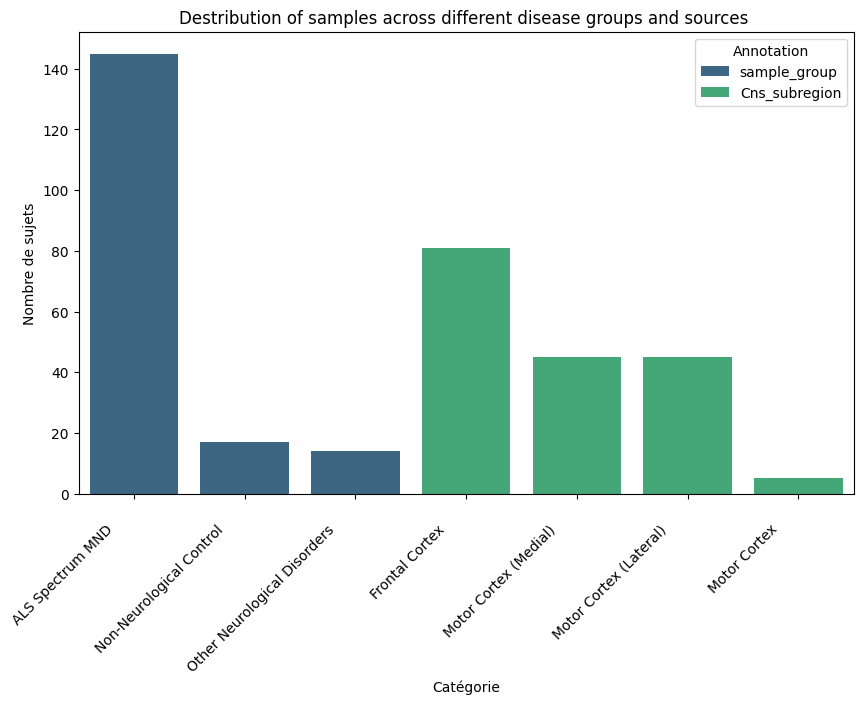

In [18]:
xml.dist_dg_src()

-> We can see that the minority of sample are of Motor Cortex type and that the data is not balanced

# class for RNA sequencing for each sample 

In [135]:
class up_data:
    def __init__(self, folder):
        self.__df_gene = []
        self.__df_gene_normalized = []
        path = folder 

        pdList = [] 
        # For all txt file
        for fname in glob.glob(path+"/*.txt"):
            df = pd.read_table(fname) # put the file in a dataframe
            sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
            df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
            df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
            df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
            pdList.append(df) # add the current dataframe in the list
            self.__df_gene = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
            self.__df_gene = self.__df_gene.transpose()
        self.__df_gene = self.__df_gene.reset_index()
        self.__df_gene = self.__df_gene.rename(columns={"index": "Sample_id", "id": "index"})

    def get_data_matrix(self):
        return self.__df_gene
    
    def normalize_df(self):
        columns_to_normalize = self.__df_gene.columns[1:]
        df_normalized = self.__df_gene.copy()  
        df_normalized[columns_to_normalize] = normalize(df_normalized[columns_to_normalize])
        self.__df_gene_normalized = df_normalized
        return self.__df_gene_normalized

    def add_mean(self):
        #deleting the first non numeric column
        self.__df_gene['mean'] = self.__df_gene.iloc[:, 1:].mean(axis=1)
    def add_median(self):
        self.__df_gene['median']=self.__df_gene.iloc[:, 1:].median(axis=1)
        
    def add_std(self):
        self.__df_gene['std']=self.__df_gene.iloc[:, 1:].std(axis=1) 
        
    def show_MCTD(self):
        fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 19))
        self.__df_gene['mean'].plot(kind='bar', ax=axes[0], title='Histogramme des Moyennes')
        self.__df_gene['median'].plot(kind='bar', ax=axes[1], title='Histogramme des Médianes')
        self.__df_gene['std'].plot(kind='bar', ax=axes[2], title="Histogramme de l'Écart Type")
        global_mean = self.__df_gene['mean'].mean()
        global_median = self.__df_gene['median'].mean()
        axes[0].axhline(global_mean, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne globale: {global_mean}')
        axes[1].axhline(global_median, color='red', linestyle='dashed', linewidth=2, label=f'Médiane globale: {global_median}')
        axes[0].set_xticklabels(self.__df_gene[self.__df_gene.columns[0]], fontsize=8)
        axes[1].set_xticklabels(self.__df_gene[self.__df_gene.columns[0]], fontsize=8)
        axes[2].set_xticklabels(self.__df_gene[self.__df_gene.columns[0]], fontsize=8)
        plt.tight_layout()
        plt.show()
        
    def show_MCTD_per_gene(self):
        df_transposed = self.__df_gene.T
        fig, ax = plt.subplots(figsize=(15, 6))
        ax.plot(df_transposed.columns, df_transposed.mean(), color='blue', label='Moyenne')
        ax.plot(df_transposed.columns, df_transposed.median(), color='green', label='Médiane')
        ax.plot(df_transposed.columns, df_transposed.std(), color='red', label="Écart Type")
        ax.set_title('Moyenne, Médiane et Écart Type par Colonne')
        ax.set_xlabel('Colonnes')
        ax.set_ylabel('Valeurs')
        plt.xticks(rotation=45)
        ax.legend()
        plt.tight_layout()
        plt.show()
        
    def column(self):
        # Calculate Mean, Median, and Standard Deviation for each gene
        gene_stats = self.__df_gene.describe().T[['mean', 'std', '50%']].rename(columns={'50%': 'median'})

        #  Identify Genes with High Variability
        genes_high_variability = gene_stats.sort_values(by='std', ascending=False)

        print("Genes with High Variability:")
        print(genes_high_variability.head())

        gene_stats.head(20).plot(y=['mean', 'median', 'std'], kind='bar', figsize=(15, 6), title='Gene Expression Overview')
        plt.xlabel('Genes')
        plt.ylabel('Values')
        plt.xticks(rotation=90)

        plt.yscale('log')

        plt.show()



    def show_MCTD_sorted(self):
        fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 19))
        means_sorted = self.__df_gene['mean'].sort_values()
        medians_sorted = self.__df_gene['median'].sort_values()
        std_devs_sorted = self.__df_gene['std'].sort_values()
        means_sorted.plot(kind='bar', ax=axes[0], title='Histogramme des Moyennes')
        medians_sorted.plot(kind='bar', ax=axes[1], title='Histogramme des Médianes')
        std_devs_sorted.plot(kind='bar', ax=axes[2], title="Histogramme de l'Écart Type")
        axes[0].set_xticklabels(self.__df_gene[self.__df_gene.columns[0]], fontsize=8)
        axes[1].set_xticklabels(self.__df_gene[self.__df_gene.columns[0]], fontsize=8)
        axes[2].set_xticklabels(self.__df_gene[self.__df_gene.columns[0]], fontsize=8)
        plt.tight_layout()
        plt.show()

    def heatmap(self):
        plt.figure(figsize=(12, 8))
       
        df_for_heatmap = self.__df_gene.drop(columns=['Sample_id'])
        # Créer une liste de tous les groupes uniques
        groups = df_for_heatmap['sample_group'].unique()

        # Tracer le heatmap pour chaque groupe
        for group in groups:
            # Sélectionner les données pour ce groupe spécifique
            group_data = df_for_heatmap[df_for_heatmap['sample_group'] == group]
            sns.heatmap(data=group_data.drop(columns=['sample_group']), cmap='viridis', cbar=True)
            plt.title(f'Heatmap de l\'expression génique pour le groupe {group}')
            plt.show()

    def my(self):
        
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 19))

        # histogrammes de moyenne, médiane et écart type
        axes[0].scatter(self.__df_gene['mean'], self.__df_gene.index, color='blue')
        axes[1].scatter(self.__df_gene['median'], self.__df_gene.index, color='green')
        axes[2].scatter(self.__df_gene['std'], self.__df_gene.index, color='red')

        # Calculer les valeurs globales de moyenne et médiane
        global_mean = self.__df_gene['mean'].mean()
        global_median = self.__df_gene['median'].mean()

        # Ajouter les lignes verticales pour les valeurs globales de moyenne et médiane
        axes[0].axvline(global_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Moyenne globale: {global_mean}')
        axes[1].axvline(global_median, color='green', linestyle='dashed', linewidth=2, label=f'Médiane globale: {global_median}')

       
        axes[0].set_xlabel('Moyennes')
        axes[1].set_xlabel('Médianes')
        axes[2].set_xlabel('Écart Type')

        plt.tight_layout()
        plt.show()
    def all_print(self):
        
        fig, ax = plt.subplots(figsize=(10, 6))

        # Tracer la moyenne en bleu
        ax.plot(self.__df_gene.index, self.__df_gene['mean'], color='blue', label='Moyenne')

        # Tracer la médiane en vert
        ax.plot(self.__df_gene.index, self.__df_gene['median'], color='green', label='Médiane')

        # Tracer l'écart type en rouge
        ax.plot(self.__df_gene.index, self.__df_gene['std'], color='red', label="Écart Type")

      
        ax.set_title('Moyenne, Médiane et Écart Type')
        ax.set_xlabel('Samples')
        ax.set_ylabel('Valeurs')

        ax.legend()

        # Affichage du graphe
        plt.tight_layout()
        plt.show()
        import seaborn as sns

    def heat_Map(self):
        
        plt.figure(figsize=(15, 19))
        sns.heatmap(self.__df_gene.drop(columns=['mean', 'median', 'std']), cmap='coolwarm', linewidths=0.5, linecolor='grey')

        
        global_mean = self.__df_gene['mean'].mean()
        global_median = self.__df_gene['median'].mean()
        plt.axhline(global_mean, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne globale: {global_mean}')
        plt.axhline(global_median, color='red', linestyle='dashed', linewidth=2, label=f'Médiane globale: {global_median}')

        plt.xlabel('Échantillons')
        plt.ylabel('Gènes')
        plt.title('Heatmap de l\'expression génique')

        
        plt.tight_layout()
        plt.show()





In [21]:
test = up_data("./Data")

Df of samples by RNA sequencing 

In [22]:
test.get_data_matrix()

,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,GSM3533230,42,149,0,3327,101,78,4,0,67,...,986,2218,2096,1120,84,556,134,570,2045,2446
1,GSM3533231,25,107,2,1787,153,109,2,1,25,...,1216,2373,2001,1144,118,582,153,552,2057,2279
2,GSM3533232,20,95,0,1830,121,127,1,1,11,...,905,2018,1815,1011,84,571,126,479,1659,1778
3,GSM3533233,22,101,0,2131,142,143,5,1,36,...,935,2278,2032,1198,97,562,132,540,2032,2135
4,GSM3533234,22,102,0,1706,83,178,1,3,31,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,GSM3533359,29,145,0,1424,119,111,1,4,52,...,751,1853,1655,922,89,503,131,463,1624,1742
130,GSM3533360,26,123,0,1541,99,164,0,1,85,...,708,1514,1433,845,58,394,102,378,1477,1529
131,GSM3533361,92,341,0,2660,163,288,0,11,78,...,1194,2785,2520,1308,123,632,163,655,2479,2930
132,GSM3533362,39,144,1,1329,79,154,2,8,35,...,678,1601,1390,797,70,319,98,389,1450,1588


Normalize Df of samples by RNA sequencing 

In [23]:
test.normalize_df().head()

,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,GSM3533230,0.000034,0.000121,0.000000,0.002708,0.000082,0.000063,3.255793e-06,0.000000e+00,0.000055,...,0.000803,0.001805,0.001706,0.000912,0.000068,0.000453,0.000109,0.000464,0.001665,0.001991
1,GSM3533231,0.000022,0.000095,0.000002,0.001587,0.000136,0.000097,1.776679e-06,8.883395e-07,0.000022,...,0.001080,0.002108,0.001778,0.001016,0.000105,0.000517,0.000136,0.000490,0.001827,0.002025
2,GSM3533232,0.000021,0.000098,0.000000,0.001895,0.000125,0.000132,1.035474e-06,1.035474e-06,0.000011,...,0.000937,0.002090,0.001879,0.001047,0.000087,0.000591,0.000130,0.000496,0.001718,0.001841
3,GSM3533233,0.000019,0.000089,0.000000,0.001879,0.000125,0.000126,4.409408e-06,8.818817e-07,0.000032,...,0.000825,0.002009,0.001792,0.001056,0.000086,0.000496,0.000116,0.000476,0.001792,0.001883
4,GSM3533234,0.000019,0.000087,0.000000,0.001458,0.000071,0.000152,8.548217e-07,2.564465e-06,0.000026,...,0.000826,0.001962,0.001704,0.000985,0.000082,0.000498,0.000106,0.000461,0.001489,0.001657


**Kipping the samples in __df_desc that only exsist in our data**

In [24]:
df_filtered = xml.get_data_matrix()[xml.get_data_matrix()['Sample_id'].isin(test.get_data_matrix()['Sample_id'])]
df_filtered.index = range(len(df_filtered))


In [25]:
df_filtered

,Sample_id,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id
0,GSM3533230,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEL133AK6
1,GSM3533231,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUYV496XLP
2,GSM3533232,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUZU200WEQ
3,GSM3533233,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUME287RK2
4,GSM3533234,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEC006FND
...,...,...,...,...,...,...
129,GSM3533359,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 74
130,GSM3533360,Motor Cortex (Medial),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 80
131,GSM3533361,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 82
132,GSM3533362,Motor Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 82


In [26]:
df_normalized = test.normalize_df()

In [27]:
df_normalized

,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,GSM3533230,0.000034,0.000121,0.000000,0.002708,0.000082,0.000063,3.255793e-06,0.000000e+00,0.000055,...,0.000803,0.001805,0.001706,0.000912,0.000068,0.000453,0.000109,0.000464,0.001665,0.001991
1,GSM3533231,0.000022,0.000095,0.000002,0.001587,0.000136,0.000097,1.776679e-06,8.883395e-07,0.000022,...,0.001080,0.002108,0.001778,0.001016,0.000105,0.000517,0.000136,0.000490,0.001827,0.002025
2,GSM3533232,0.000021,0.000098,0.000000,0.001895,0.000125,0.000132,1.035474e-06,1.035474e-06,0.000011,...,0.000937,0.002090,0.001879,0.001047,0.000087,0.000591,0.000130,0.000496,0.001718,0.001841
3,GSM3533233,0.000019,0.000089,0.000000,0.001879,0.000125,0.000126,4.409408e-06,8.818817e-07,0.000032,...,0.000825,0.002009,0.001792,0.001056,0.000086,0.000496,0.000116,0.000476,0.001792,0.001883
4,GSM3533234,0.000019,0.000087,0.000000,0.001458,0.000071,0.000152,8.548217e-07,2.564465e-06,0.000026,...,0.000826,0.001962,0.001704,0.000985,0.000082,0.000498,0.000106,0.000461,0.001489,0.001657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,GSM3533359,0.000028,0.000140,0.000000,0.001371,0.000115,0.000107,9.625657e-07,3.850263e-06,0.000050,...,0.000723,0.001784,0.001593,0.000887,0.000086,0.000484,0.000126,0.000446,0.001563,0.001677
130,GSM3533360,0.000029,0.000135,0.000000,0.001691,0.000109,0.000180,0.000000e+00,1.097462e-06,0.000093,...,0.000777,0.001662,0.001573,0.000927,0.000064,0.000432,0.000112,0.000415,0.001621,0.001678
131,GSM3533361,0.000060,0.000223,0.000000,0.001738,0.000107,0.000188,0.000000e+00,7.188532e-06,0.000051,...,0.000780,0.001820,0.001647,0.000855,0.000080,0.000413,0.000107,0.000428,0.001620,0.001915
132,GSM3533362,0.000045,0.000166,0.000001,0.001533,0.000091,0.000178,2.307654e-06,9.230617e-06,0.000040,...,0.000782,0.001847,0.001604,0.000920,0.000081,0.000368,0.000113,0.000449,0.001673,0.001832


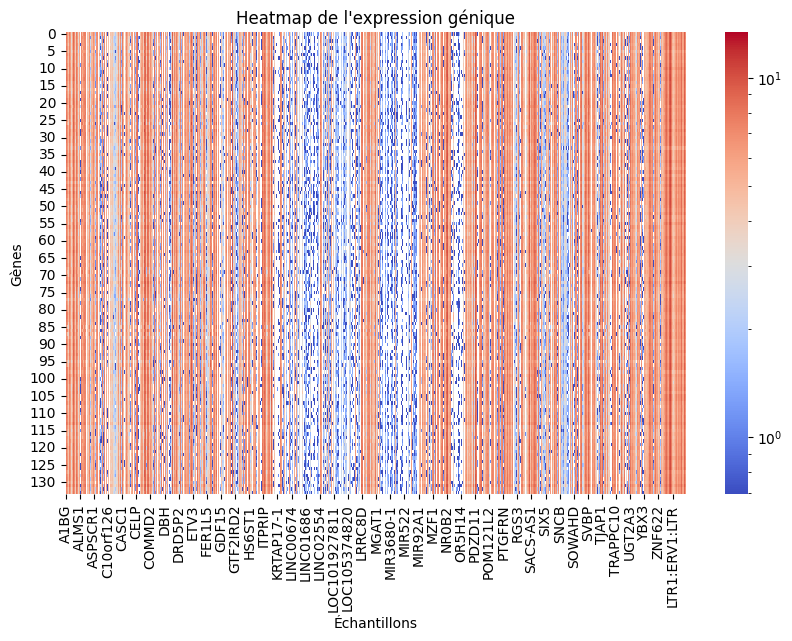

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

slt = np.log1p(test.get_data_matrix().drop(columns='Sample_id'))
df_genes = df_normalized.iloc[:, 1:]
plt.figure(figsize=(10, 6))  
sns.heatmap(slt, cmap='coolwarm', linewidths=0, linecolor='grey', norm=mcolors.LogNorm())

plt.xlabel('Échantillons')
plt.ylabel('Gènes')

plt.title('Heatmap de l\'expression génique')
plt.show()

Top 20 genes with high variability

Genes with High Variability:
                        mean            std    median
MBP            116258.380597  124436.943964   78623.5
MALAT1         328380.186567  109945.293517  316265.0
MIRb:MIR:SINE  360656.708955   94305.903658  358780.0
7SK:RNA:RNA    131052.223881   84976.286446  107144.5
L2a:L2:LINE    276840.156716   74434.190299  279419.0


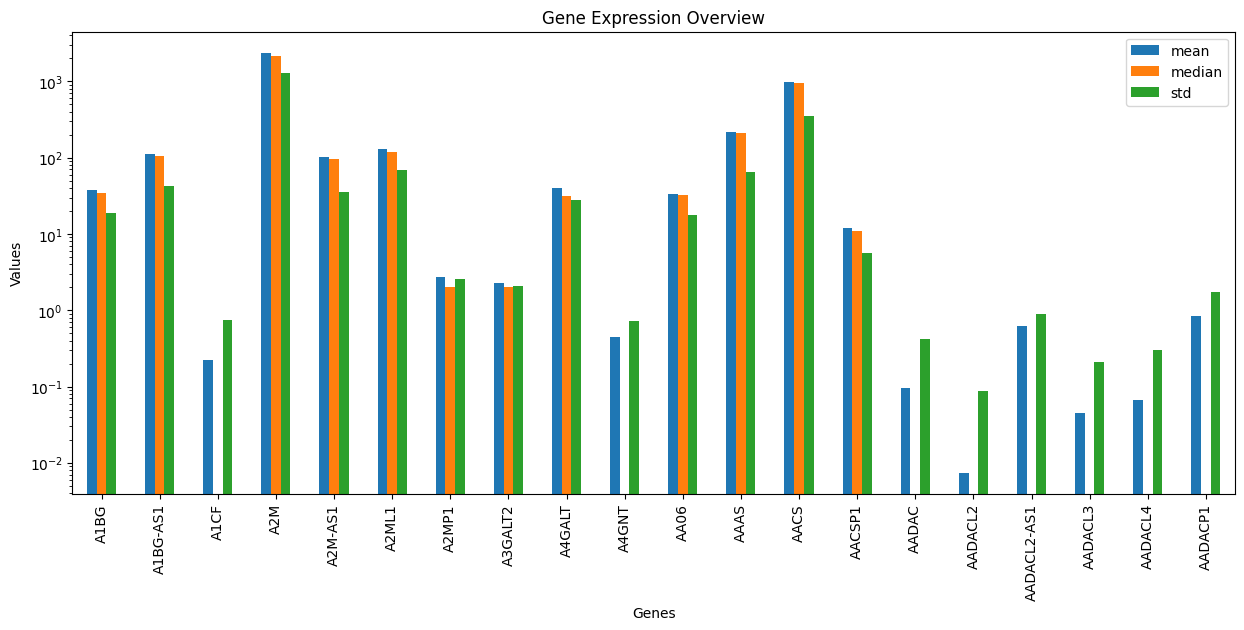

In [29]:
test.column()

# Per sample (row)

In [30]:
#test.show_MCTD_per_gene()

In [31]:
test.add_mean()
test.add_median()
test.add_std()

In [33]:
test.get_data_matrix()

,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean,median,std
0,GSM3533230,42,149,0,3327,101,78,4,0,67,...,1120,84,556,134,570,2045,2446,1041.382378,92.0,7144.704122
1,GSM3533231,25,107,2,1787,153,109,2,1,25,...,1144,118,582,153,552,2057,2279,881.608503,65.0,6556.559836
2,GSM3533232,20,95,0,1830,121,127,1,1,11,...,1011,84,571,126,479,1659,1778,802.592132,58.0,5618.501726
3,GSM3533233,22,101,0,2131,142,143,5,1,36,...,1198,97,562,132,540,2032,2135,785.868615,65.0,6617.509212
4,GSM3533234,22,102,0,1706,83,178,1,3,31,...,1152,96,582,124,539,1742,1939,906.813525,61.0,6814.896898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,GSM3533359,29,145,0,1424,119,111,1,4,52,...,922,89,503,131,463,1624,1742,1054.103236,91.0,6013.738999
130,GSM3533360,26,123,0,1541,99,164,0,1,85,...,845,58,394,102,378,1477,1529,737.670570,67.0,5303.908658
131,GSM3533361,92,341,0,2660,163,288,0,11,78,...,1308,123,632,163,655,2479,2930,1560.718302,133.0,8856.408532
132,GSM3533362,39,144,1,1329,79,154,2,8,35,...,797,70,319,98,389,1450,1588,794.378234,65.0,5031.042564


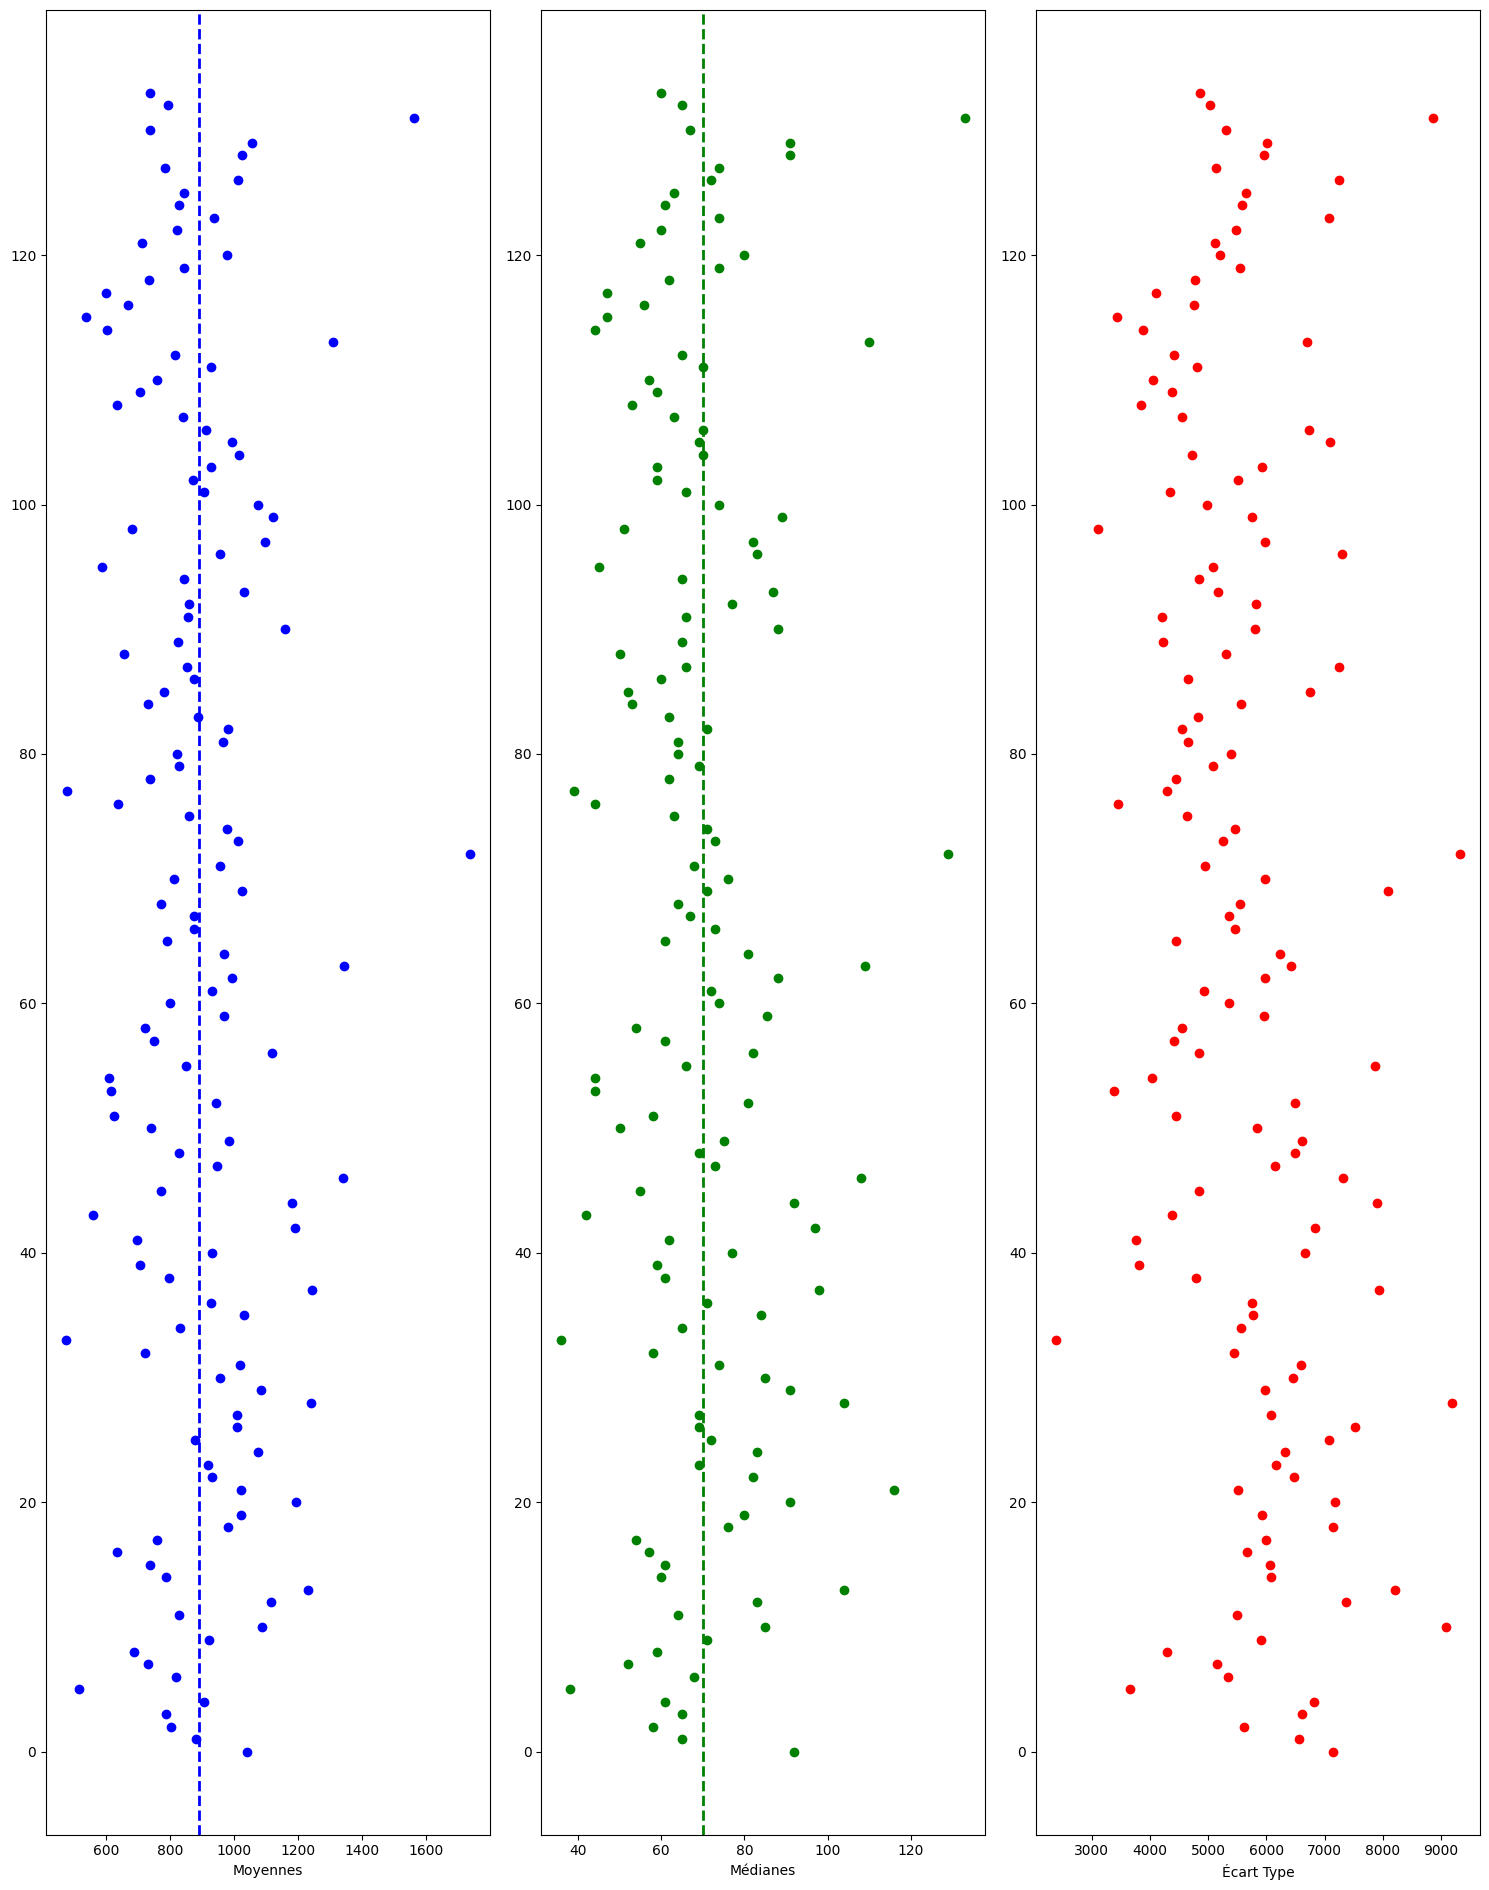

In [34]:
test.my()

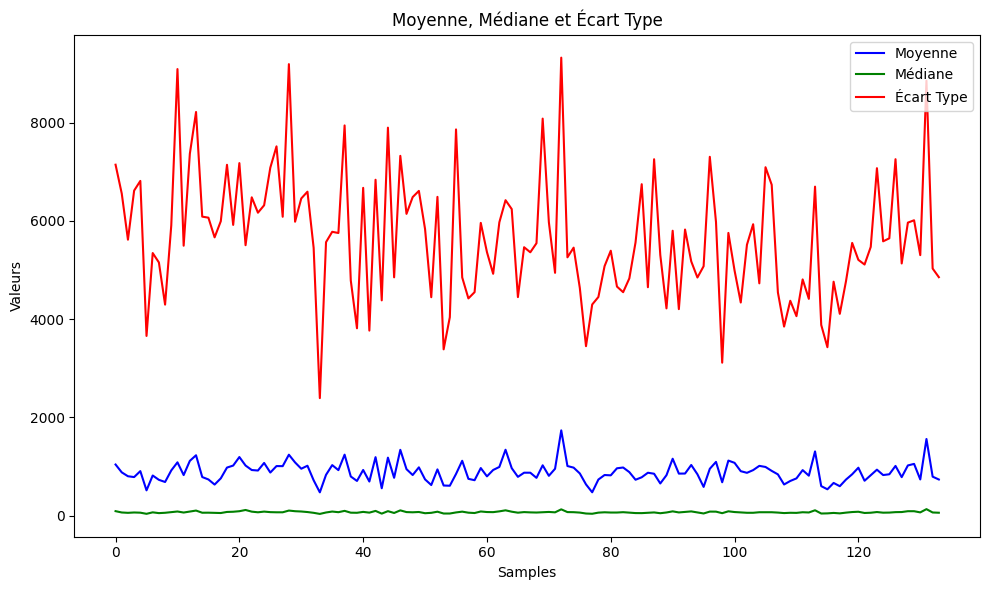

In [35]:
test.all_print()

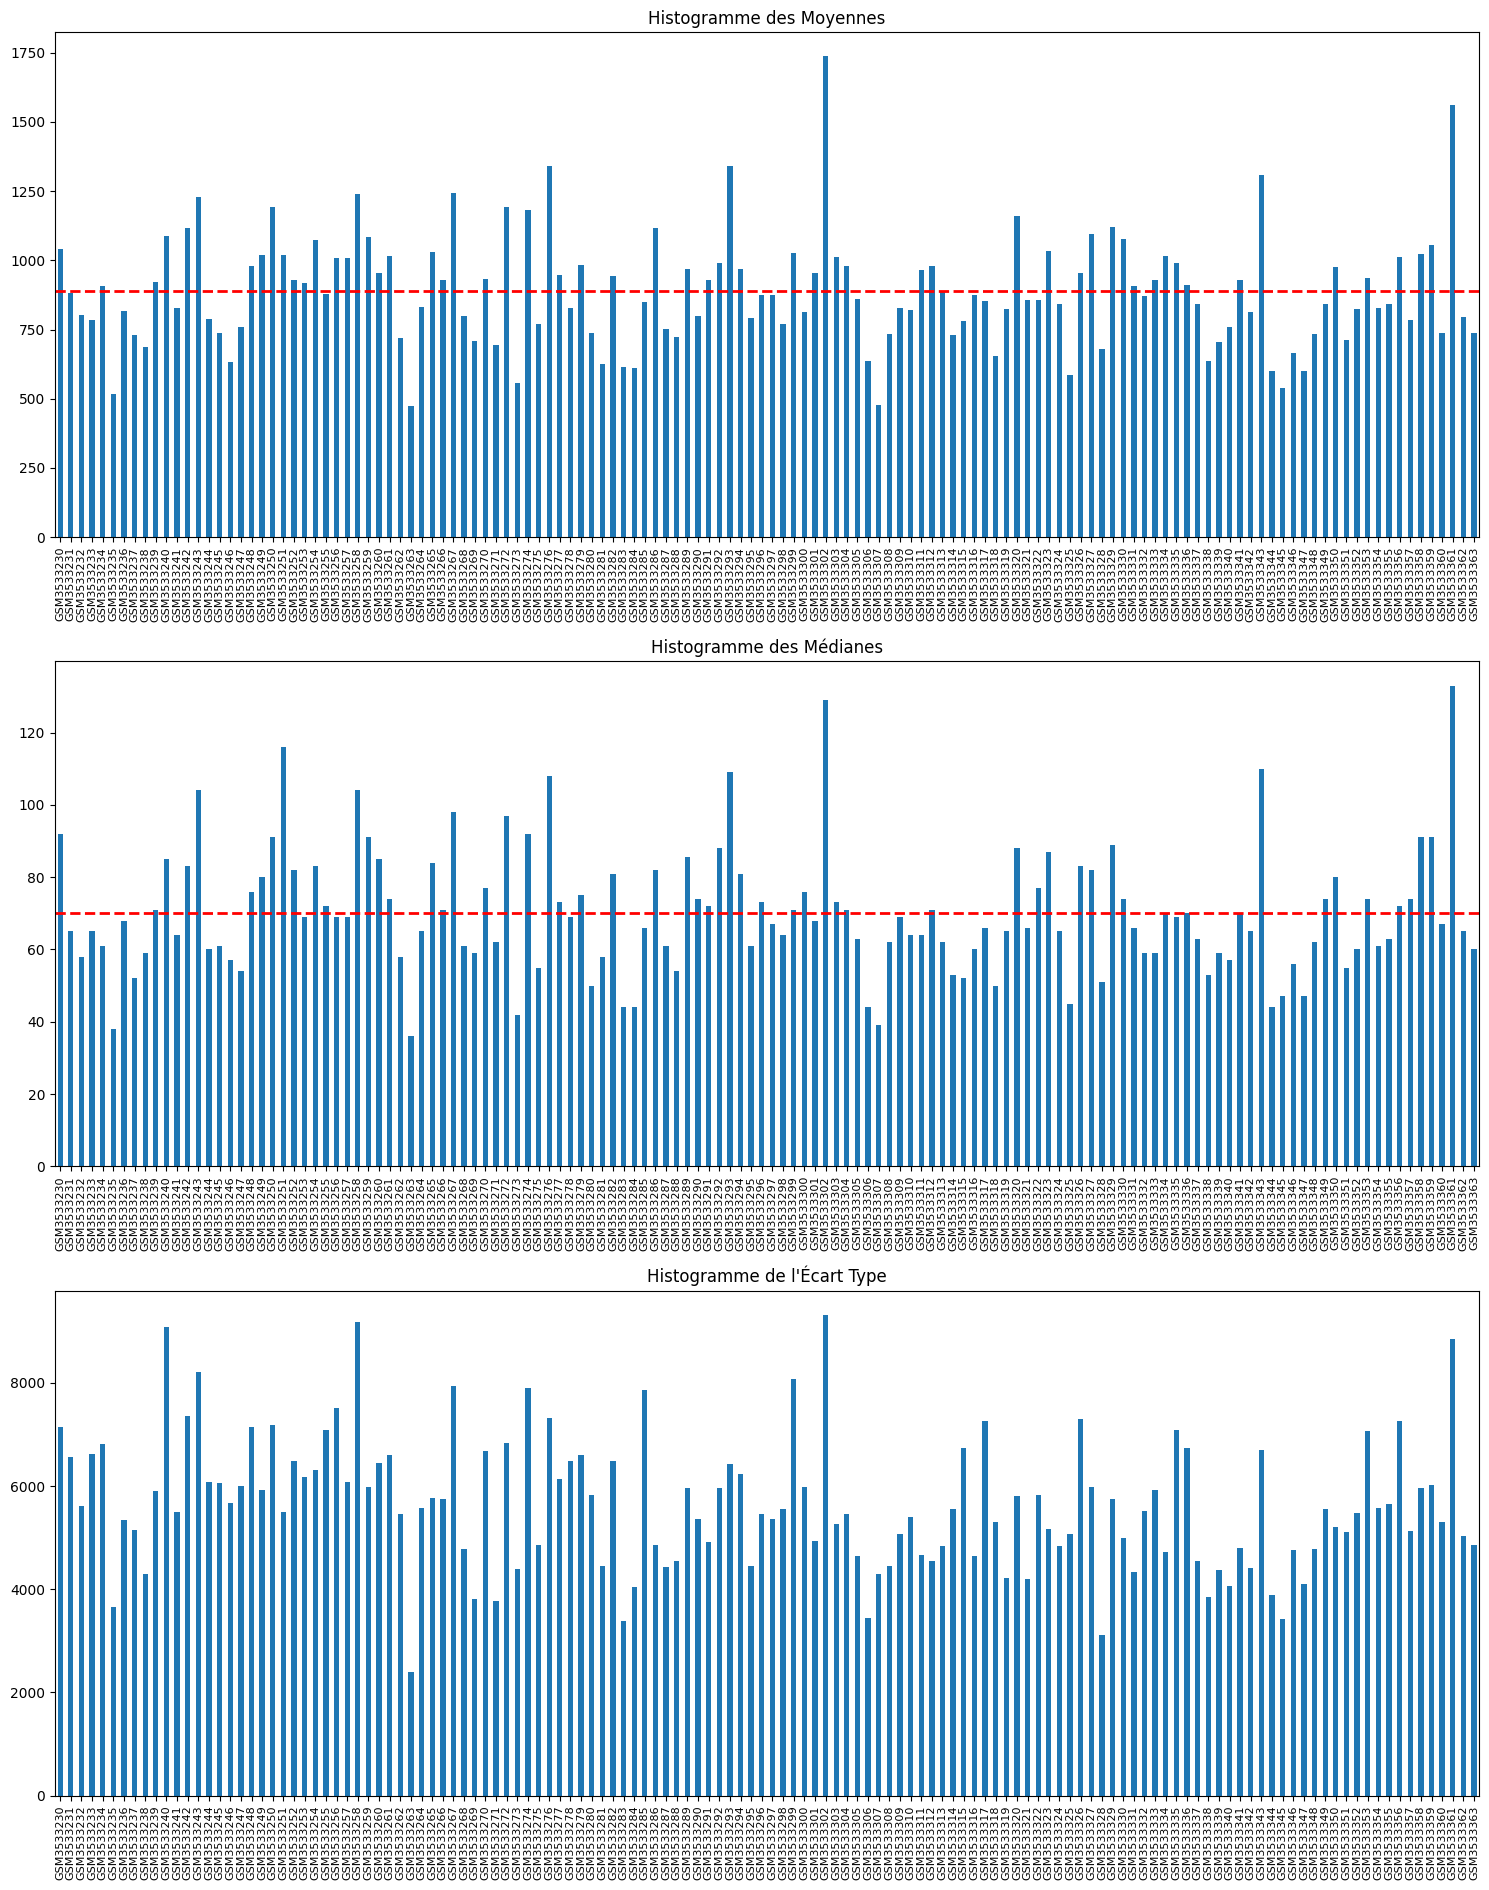

In [36]:
test.show_MCTD()

Merged DF of genes and their description

In [37]:
merged_df = pd.merge(test.get_data_matrix(), xml.get_data_matrix(), left_on='Sample_id', right_on='Sample_id')

In [38]:
merged_df

,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean,median,std,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id
0,GSM3533230,42,149,0,3327,101,78,4,0,67,...,2045,2446,1041.382378,92.0,7144.704122,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEL133AK6
1,GSM3533231,25,107,2,1787,153,109,2,1,25,...,2057,2279,881.608503,65.0,6556.559836,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUYV496XLP
2,GSM3533232,20,95,0,1830,121,127,1,1,11,...,1659,1778,802.592132,58.0,5618.501726,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUZU200WEQ
3,GSM3533233,22,101,0,2131,142,143,5,1,36,...,2032,2135,785.868615,65.0,6617.509212,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUME287RK2
4,GSM3533234,22,102,0,1706,83,178,1,3,31,...,1742,1939,906.813525,61.0,6814.896898,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEC006FND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,GSM3533359,29,145,0,1424,119,111,1,4,52,...,1624,1742,1054.103236,91.0,6013.738999,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 74
130,GSM3533360,26,123,0,1541,99,164,0,1,85,...,1477,1529,737.670570,67.0,5303.908658,Motor Cortex (Medial),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 80
131,GSM3533361,92,341,0,2660,163,288,0,11,78,...,2479,2930,1560.718302,133.0,8856.408532,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 82
132,GSM3533362,39,144,1,1329,79,154,2,8,35,...,1450,1588,794.378234,65.0,5031.042564,Motor Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 82


**boxplot for each disease group**

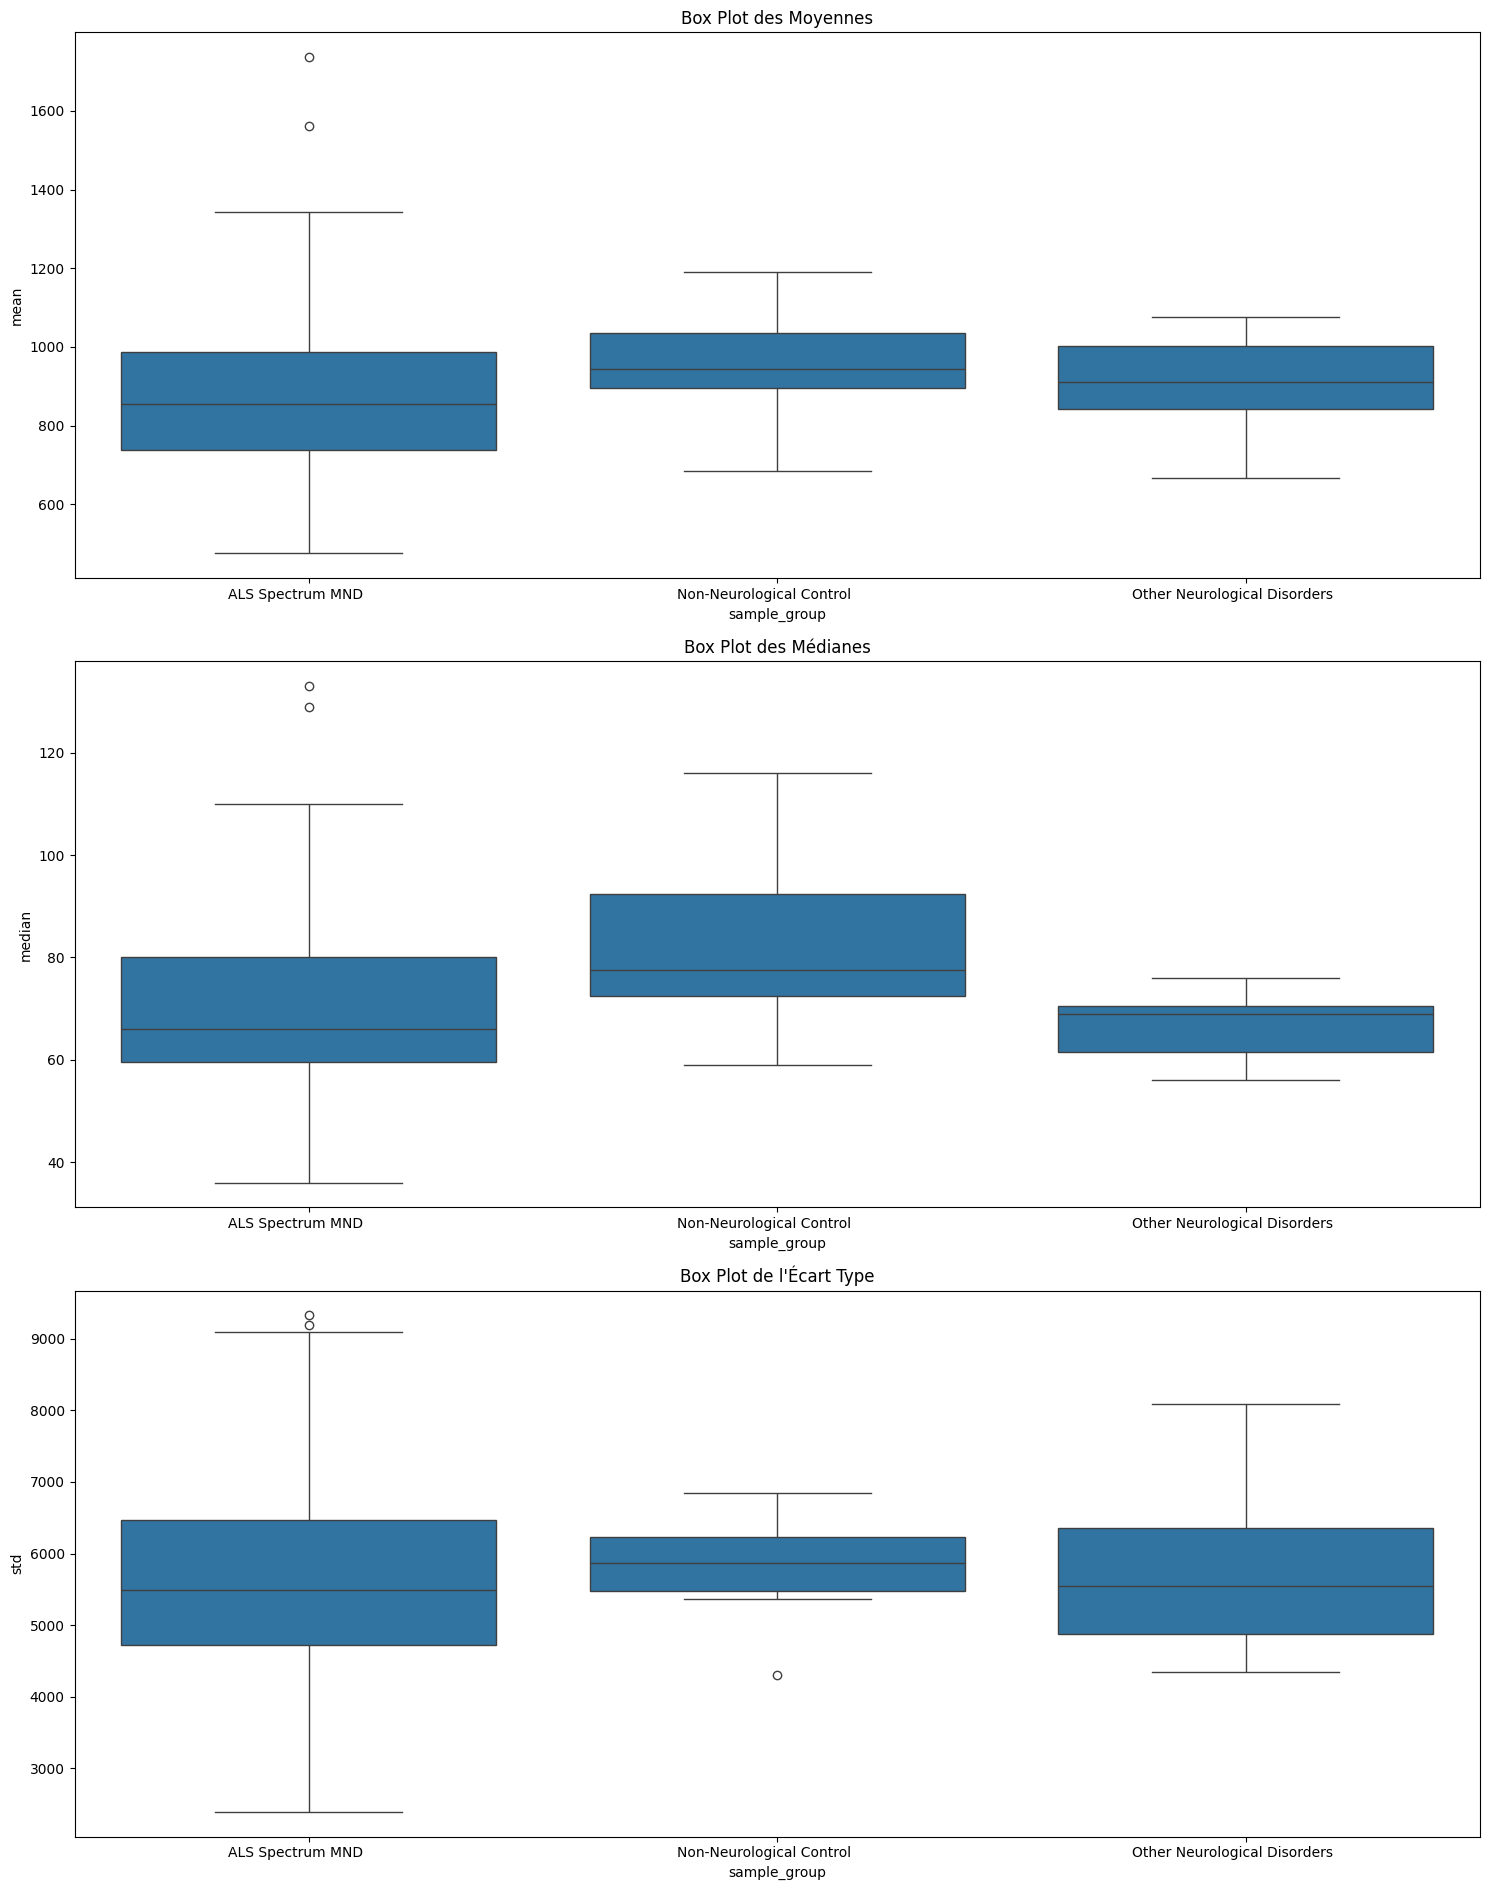

In [39]:
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 19))
    
# Tracer les box plots pour les moyennes, les médianes et les écarts types
sns.boxplot(x='sample_group', y='mean', data=merged_df, ax=axes[0])
axes[0].set_title('Box Plot des Moyennes')
sns.boxplot(x='sample_group', y='median', data=merged_df, ax=axes[1])
axes[1].set_title('Box Plot des Médianes')
sns.boxplot(x='sample_group', y='std', data=merged_df, ax=axes[2])
axes[2].set_title("Box Plot de l'Écart Type")
    
plt.tight_layout()
plt.show()

**boxplot for each sample source**

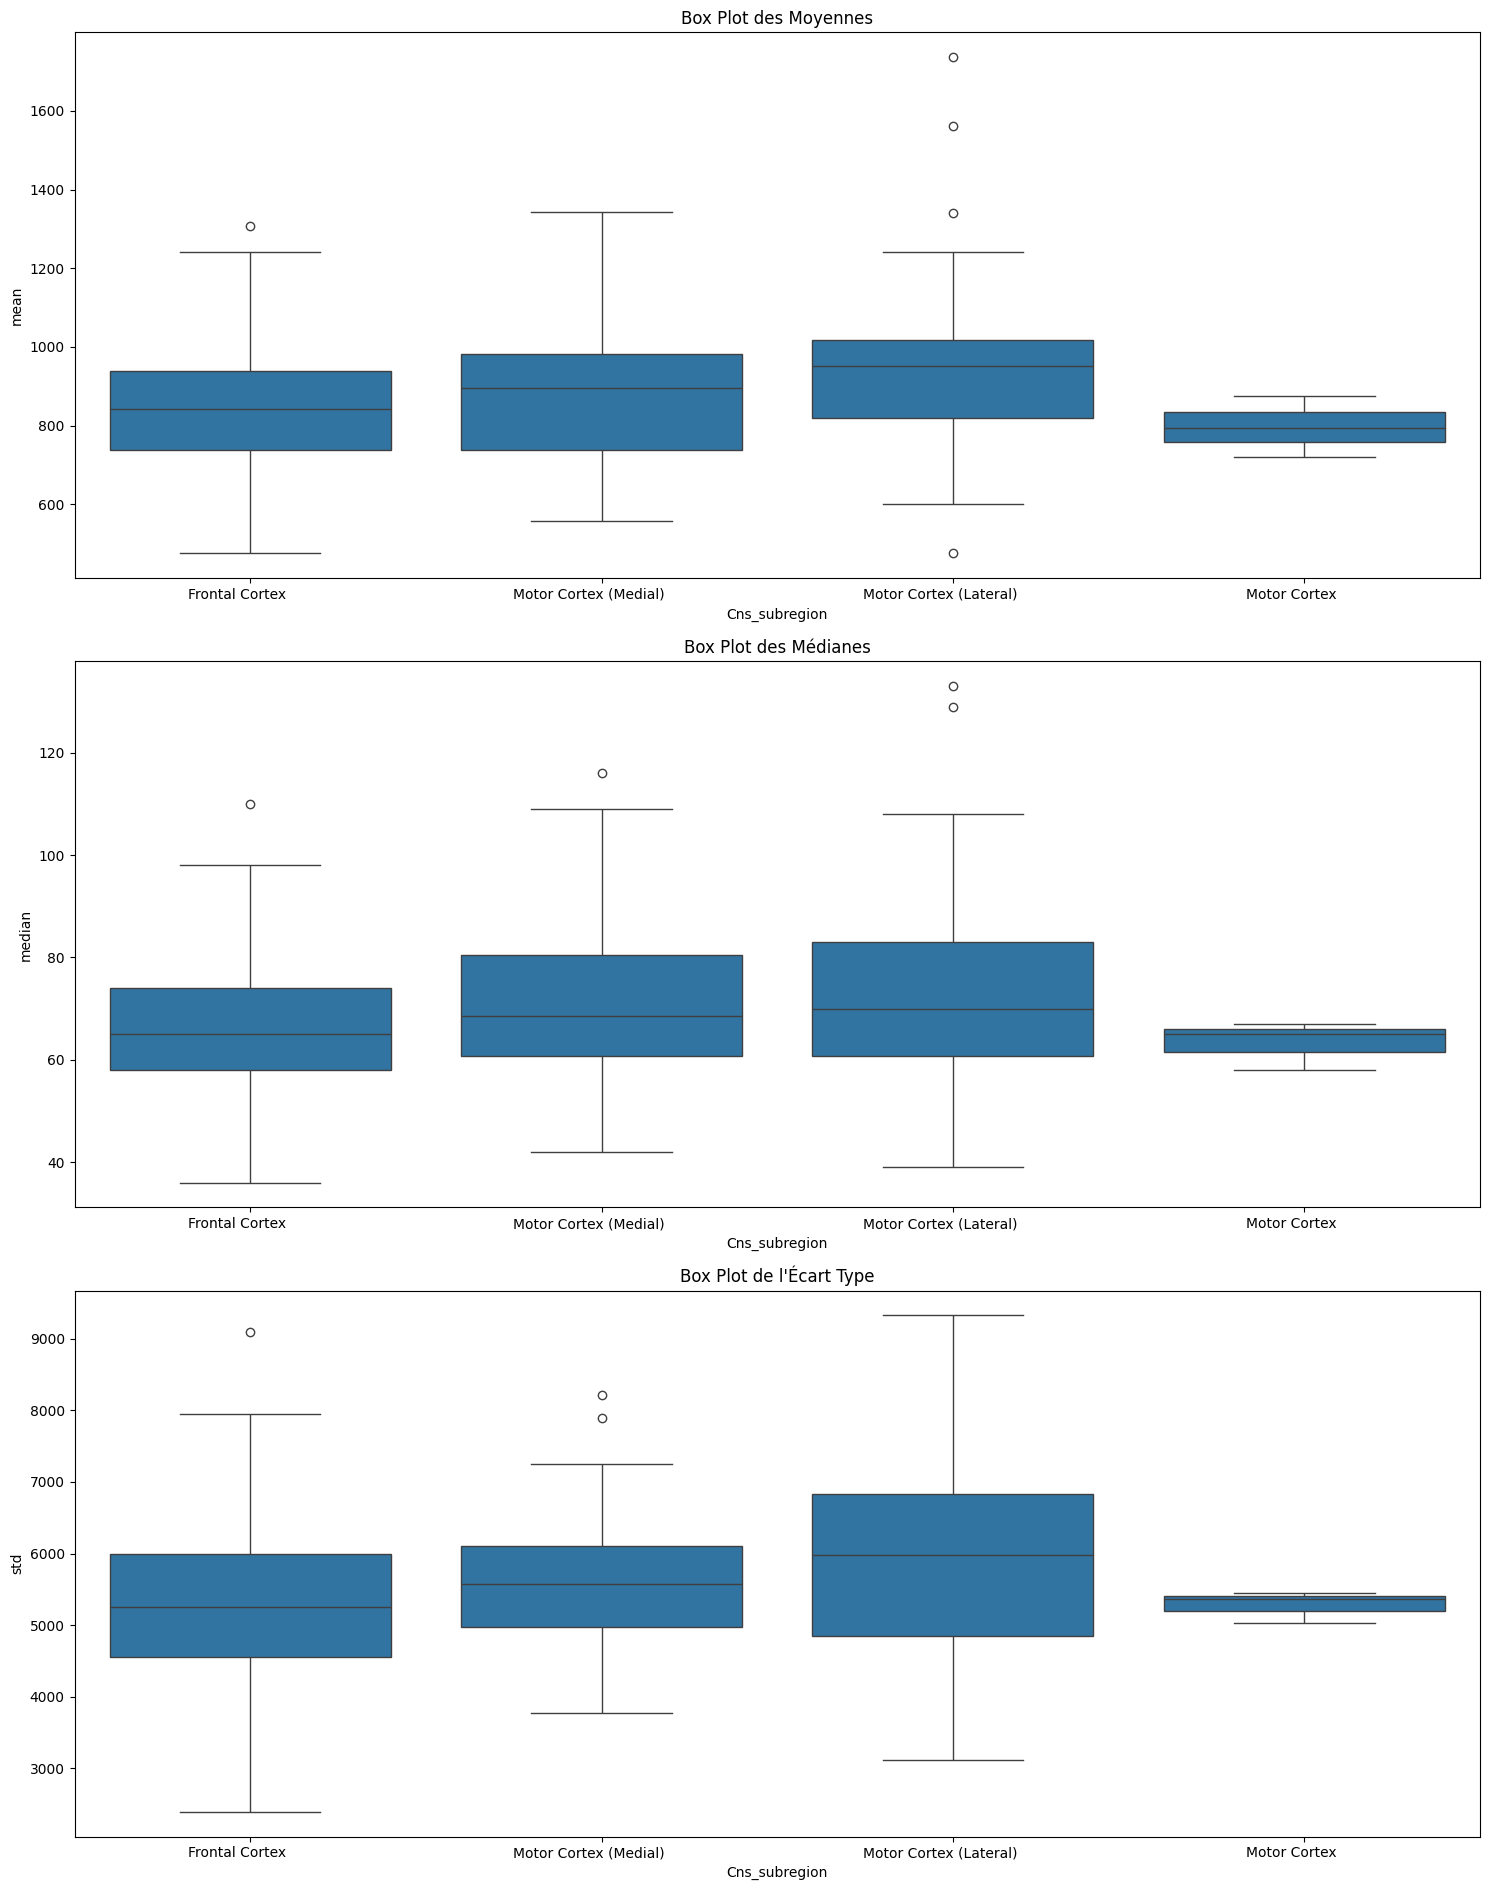

In [40]:
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 19))
    
# Tracer les box plots pour les moyennes, les médianes et les écarts types
sns.boxplot(x='Cns_subregion', y='mean', data=merged_df, ax=axes[0])
axes[0].set_title('Box Plot des Moyennes')
sns.boxplot(x='Cns_subregion', y='median', data=merged_df, ax=axes[1])
axes[1].set_title('Box Plot des Médianes')
sns.boxplot(x='Cns_subregion', y='std', data=merged_df, ax=axes[2])
axes[2].set_title("Box Plot de l'Écart Type")
    
plt.tight_layout()
plt.show()

In [41]:
outliers_mean = merged_df[merged_df['mean'] > merged_df['mean'].quantile(0.75) + 1.5 * (merged_df['mean'].quantile(0.75) - merged_df['mean'].quantile(0.25))].index
outliers_median = merged_df[merged_df['median'] > merged_df['median'].quantile(0.75) + 1.5 * (merged_df['median'].quantile(0.75) - merged_df['median'].quantile(0.25))].index
outliers_std = merged_df[merged_df['std'] > merged_df['std'].quantile(0.75) + 1.5 * (merged_df['std'].quantile(0.75) - merged_df['std'].quantile(0.25))].index

In [42]:
print("Lignes correspondant aux outliers pour les moyennes :")
merged_df.iloc[outliers_mean]

Lignes correspondant aux outliers pour les moyennes :


,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean,median,std,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id
72,GSM3533302,63,292,2,4053,207,293,5,4,42,...,2652,3049,1736.451145,129.0,9324.095970,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEF397VVN
131,GSM3533361,92,341,0,2660,163,288,0,11,78,...,2479,2930,1560.718302,133.0,8856.408532,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 82


In [43]:
# Afficher les lignes correspondant aux indices des outliers pour les médianes
print("\nLignes correspondant aux outliers pour les médianes :")
merged_df.iloc[outliers_median]


Lignes correspondant aux outliers pour les médianes :


,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean,median,std,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id
21,GSM3533251,109,154,0,2560,136,117,4,4,64,...,1032,1164,1020.831416,116.0,5506.087266,Motor Cortex (Medial),post-mortem tissue,Flash frozen autopsy tissue,Non-Neurological Control,NEUHC282LVJ
63,GSM3533293,38,166,0,5970,190,153,0,0,129,...,1618,2049,1342.107726,109.0,6422.330826,Motor Cortex (Medial),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUCW292DYJ
72,GSM3533302,63,292,2,4053,207,293,5,4,42,...,2652,3049,1736.451145,129.0,9324.095970,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEF397VVN
113,GSM3533343,56,219,6,4688,150,129,2,4,40,...,1751,2131,1308.257210,110.0,6698.209162,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUDG727NTW
131,GSM3533361,92,341,0,2660,163,288,0,11,78,...,2479,2930,1560.718302,133.0,8856.408532,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,JHU 82


In [44]:
# Afficher les lignes correspondant aux indices des outliers pour les écarts types
print("\nLignes correspondant aux outliers pour les écarts types :")
merged_df.iloc[outliers_std]


Lignes correspondant aux outliers pour les écarts types :


,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean,median,std,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id
10,GSM3533240,44,178,1,1577,140,188,1,3,19,...,2532,2501,1086.036197,85.0,9091.458123,Frontal Cortex,post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUYB686REL
28,GSM3533258,85,166,3,3833,225,60,1,3,57,...,2649,2692,1241.188996,104.0,9191.984117,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUWX086DGZ
72,GSM3533302,63,292,2,4053,207,293,5,4,42,...,2652,3049,1736.451145,129.0,9324.095970,Motor Cortex (Lateral),post-mortem tissue,Flash frozen autopsy tissue,ALS Spectrum MND,NEUEF397VVN


In [45]:
import numpy as np

outliers_indices = []

for ax in axes:
    x = ax.get_lines()[4].get_xdata()
    y = ax.get_lines()[4].get_ydata()

    # Identifier les outliers pour chaque catégorie
    outliers = (y < ax.get_ylim()[0]) | (y > ax.get_ylim()[1])

    # Ajouter les indices des outliers à la liste
    outliers_indices.extend(x[outliers])

# Supprimer les doublons 
outliers_indices = list(set(outliers_indices))

merged_df.iloc[outliers_indices]


,Sample_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean,median,std,Cns_subregion,tissue_type,Treatment-Protocol,sample_group,subject_id


**Per Gene**

In [46]:
import matplotlib.pyplot as plt

def show_MCTD_per_gene(self):
    numeric_columns = self.__df_gene.select_dtypes(include=['float64', 'int64'])

    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(numeric_columns.columns, numeric_columns.mean(), color='blue', label='Moyenne')

    ax.plot(numeric_columns.columns, numeric_columns.median(), color='green', label='Médiane')

    ax.plot(numeric_columns.columns, numeric_columns.std(), color='red', label="Écart Type")

    ax.set_title('Moyenne, Médiane et Écart Type par Colonne')
    ax.set_xlabel('Colonnes')
    ax.set_ylabel('Valeurs')

    plt.xticks(rotation=45)

    ax.legend()

    plt.tight_layout()
    plt.show()


genes les plus important

In [47]:
# Initialisation du dictionnaire pour stocker les gènes et leurs coefficients
tableau_genes = {}

def mettre_a_jour_tableau(gene, coefficient):
    if gene not in tableau_genes:
        tableau_genes[gene] = coefficient
    else:
        tableau_genes[gene] += coefficient

def raz_tableau():
    tableau_genes.clear()

# PCA

In [48]:
df_genes = test.get_data_matrix().copy()

In [49]:
df_genes.set_index('Sample_id', inplace=True)

In [50]:
col_a_supp = ['mean', 'median', 'std']
df_genes.drop(col_a_supp, axis=1, inplace=True)

In [51]:
df_genes

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533359,29,145,0,1424,119,111,1,4,52,0,...,751,1853,1655,922,89,503,131,463,1624,1742
GSM3533360,26,123,0,1541,99,164,0,1,85,0,...,708,1514,1433,845,58,394,102,378,1477,1529
GSM3533361,92,341,0,2660,163,288,0,11,78,0,...,1194,2785,2520,1308,123,632,163,655,2479,2930


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_genes) 

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


In [54]:
pca.components_.shape

(102, 28953)

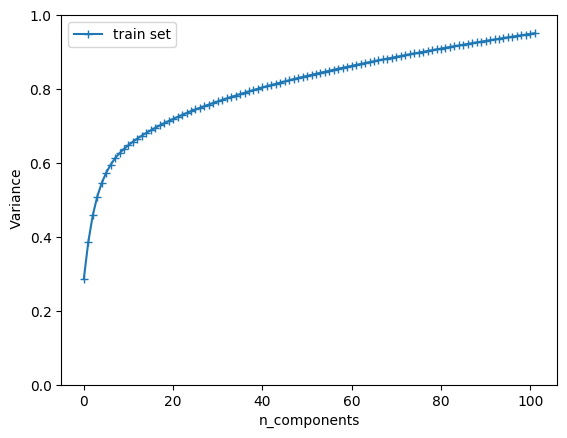

In [55]:
CumulativeExplainedVariance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance, marker='+', label="train set")
plt.xlabel("n_components")
plt.ylabel(" Variance")
plt.ylim([0,1])
plt.legend()

In [56]:
unique_groups = merged_df['sample_group'].unique()
print(unique_groups)

['ALS Spectrum MND      ' 'Non-Neurological Control      '
 'Other Neurological Disorders      ']


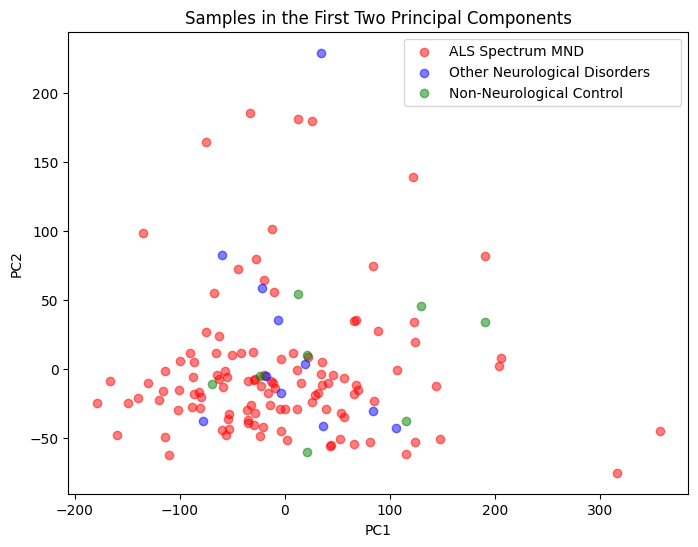

In [57]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
ax = plt.gca()

color_mapping = {
    'ALS Spectrum MND      ': 'red',
    'Other Neurological Disorders      ': 'blue',
    'Non-Neurological Control      ': 'green'
}

# Tracer les points en fonction du groupe d'échantillons auquel ils appartiennent
for group, color in color_mapping.items():
    group_df = merged_df[merged_df['sample_group'] == group]
    ax.scatter(X_pca[group_df.index, 0], X_pca[group_df.index, 1], c=color, alpha=0.5, label=group)

plt.legend()

plt.title('Samples in the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


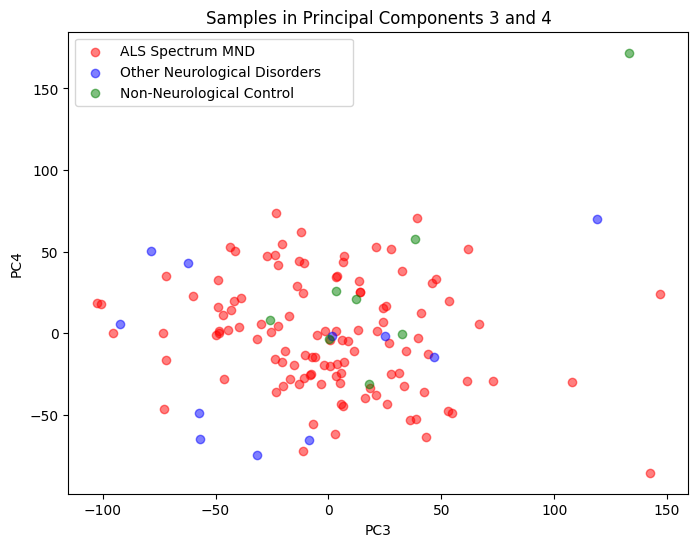

In [58]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
ax = plt.gca()

color_mapping = {
    'ALS Spectrum MND      ': 'red',
    'Other Neurological Disorders      ': 'blue',
    'Non-Neurological Control      ': 'green'
}

for group, color in color_mapping.items():
    group_df = merged_df[merged_df['sample_group'] == group]
    ax.scatter(X_pca[group_df.index, 2], X_pca[group_df.index, 3], c=color, alpha=0.5, label=group)  # Utilisation de PC3 et PC4

plt.legend()

plt.title('Samples in Principal Components 3 and 4')  
plt.xlabel('PC3') 
plt.ylabel('PC4')  

plt.show()


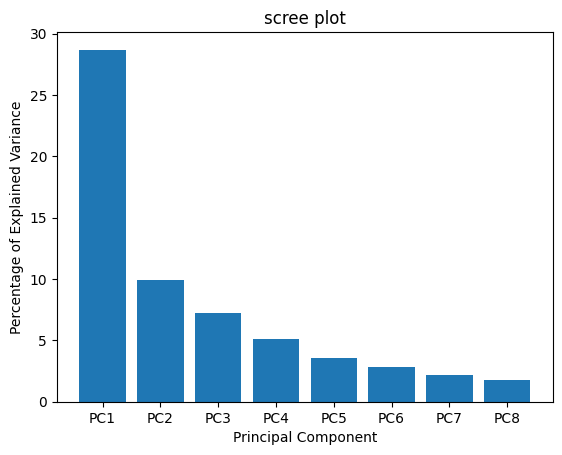

In [59]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
PCS = per_var[:8]

labels = ['PC' + str(x) for x in range(1, 9)]

plt.bar(x=range(1,9), height=PCS, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('scree plot')
plt.show()

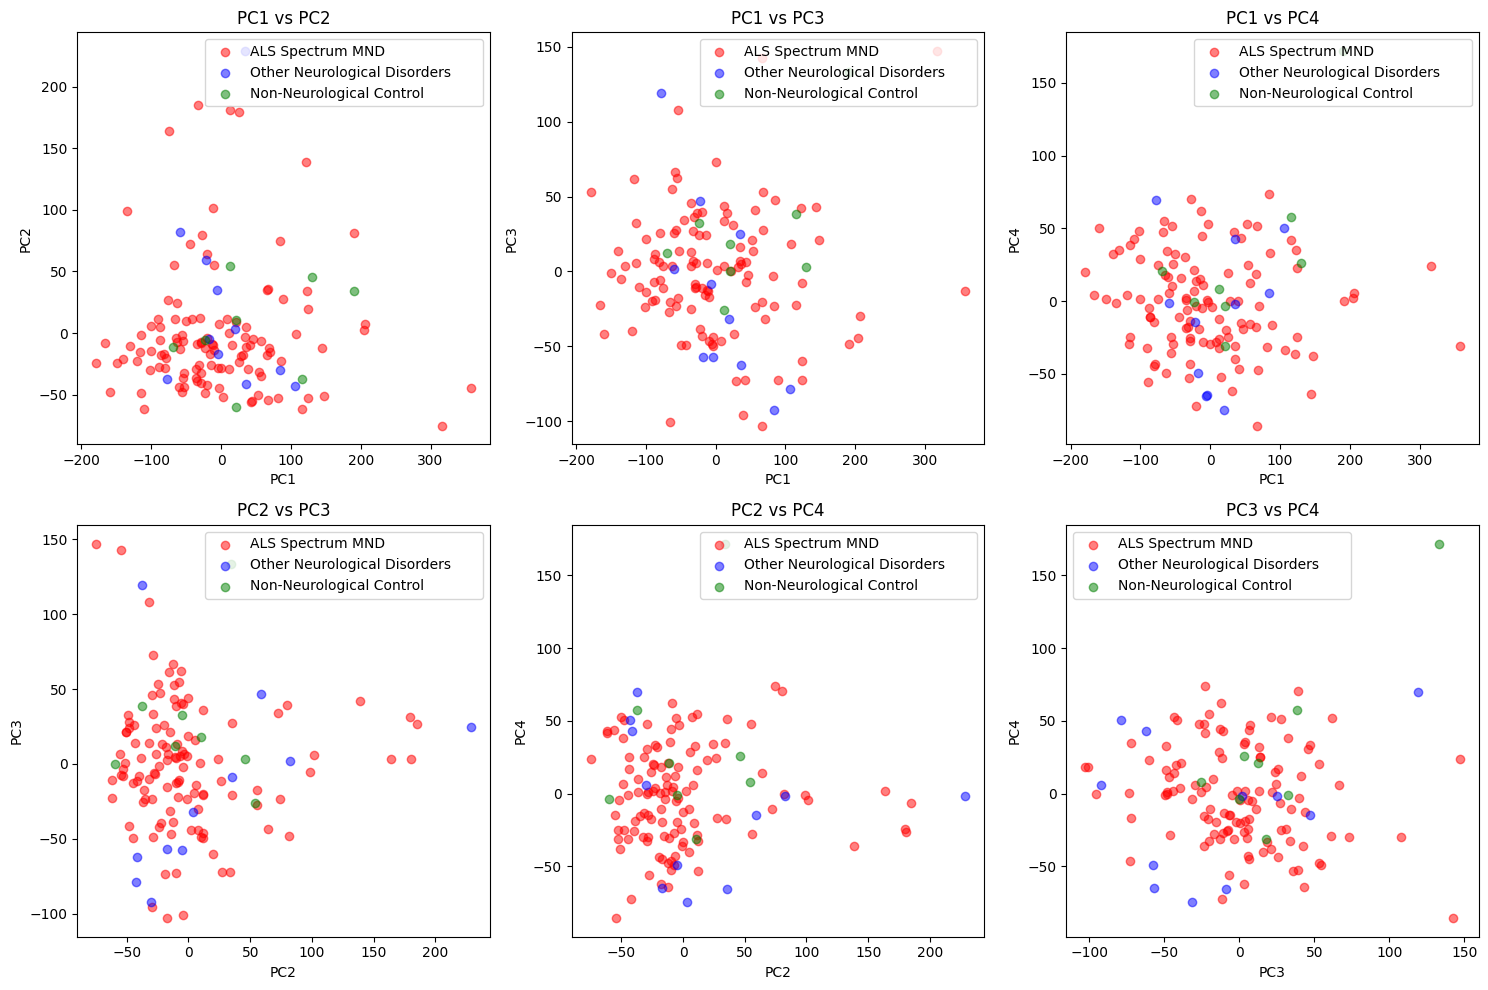

In [60]:
#les paires a comparer
component_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

for i, (comp1, comp2) in enumerate(component_pairs):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    # Tracez les points en utilisant les deux composantes principales de cette paire
    for group, color in color_mapping.items():
        group_df = merged_df[merged_df['sample_group'] == group]
        ax.scatter(X_pca[group_df.index, comp1], X_pca[group_df.index, comp2], c=color, alpha=0.5, label=group)
    
    ax.set_title(f'PC{comp1+1} vs PC{comp2+1}')
    ax.set_xlabel(f'PC{comp1+1}')
    ax.set_ylabel(f'PC{comp2+1}')
    ax.legend()  

plt.tight_layout()
plt.show()


In [61]:
# Extraire les poids attribués à chaque feature dans la première composante principale (PC1)
weights_pc1 = pca.components_[0]

# Créer un DataFrame pour visualiser les poids attribués à chaque feature
features_pc1 = pd.DataFrame({'Feature': df_genes.columns, 'Weight': weights_pc1})

# Trier les features par poids (en valeur absolue) pour déterminer les plus importants
features_pc1_sorted = features_pc1.reindex(features_pc1['Weight'].abs().sort_values(ascending=False).index)

# Afficher les features les plus importants pour PC1
print("Features contributing most to PC1:")
print(features_pc1_sorted.head())


Features contributing most to PC1:
      Feature    Weight
6045     FAF2  0.010762
13688   LONP2  0.010761
24364  SUPT7L  0.010692
17139   N4BP1  0.010672
7428   GLT8D1  0.010672


In [62]:
# Extraire les poids attribués à chaque feature dans la première composante principale (PC2)
weights_pc2 = pca.components_[1]

# Créer un DataFrame pour visualiser les poids attribués à chaque feature
features_pc2 = pd.DataFrame({'Feature': df_genes.columns, 'Weight': weights_pc2})

# Trier les features par poids (en valeur absolue) pour déterminer les plus importants
features_pc2_sorted = features_pc2.reindex(features_pc2['Weight'].abs().sort_values(ascending=False).index)

# Afficher les features les plus importants pour PC1
print("Features contributing most to PC2:")
tab = features_pc2_sorted[features_pc2_sorted['Weight']>0]
print(tab[:15])

Features contributing most to PC2:
         Feature    Weight
26712       VRK2  0.017677
6620        FGF1  0.017522
5172      DOCK10  0.017517
22664    SLC35D2  0.017512
20242      PRR5L  0.017506
10490  LINC00601  0.017390
25044       TJP2  0.017372
5178       DOCK5  0.017321
24117       ST18  0.017317
1772        BLID  0.017282
13751       LRP2  0.017260
13821     LRRC63  0.017246
2159     C1QTNF3  0.017232
4337      CTNNA3  0.017224
14092     MAN2A1  0.017221


**PCA plot per SubRegion**

In [63]:
unique_groups_reg = merged_df['Cns_subregion'].unique()
print(unique_groups_reg)

['Frontal Cortex      ' 'Motor Cortex (Medial)      '
 'Motor Cortex (Lateral)      ' 'Motor Cortex      ']


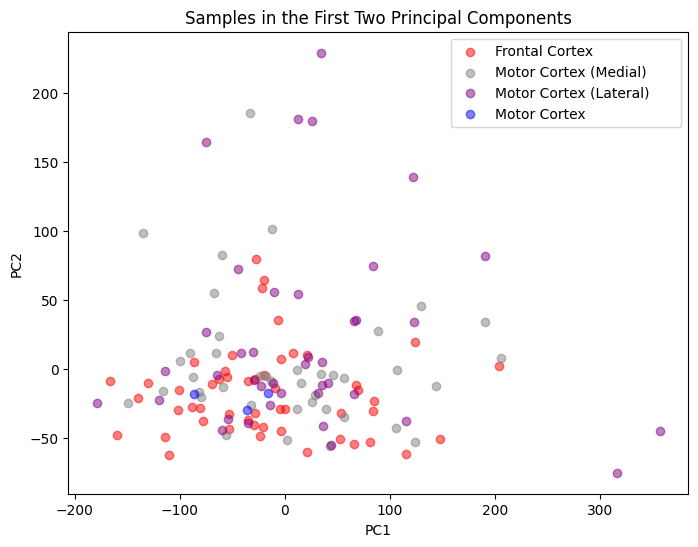

In [64]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
ax = plt.gca()

color_mapping_reg = {
    'Frontal Cortex      ': 'red',
    'Motor Cortex (Medial)      ': 'gray',
    'Motor Cortex (Lateral)      ': 'purple',
    'Motor Cortex      ': 'blue'
}

for group, color in color_mapping_reg.items():
    group_df = merged_df[merged_df['Cns_subregion'] == group]
    ax.scatter(X_pca[group_df.index, 0], X_pca[group_df.index, 1], c=color, alpha=0.5, label=group)

plt.legend()

plt.title('Samples in the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


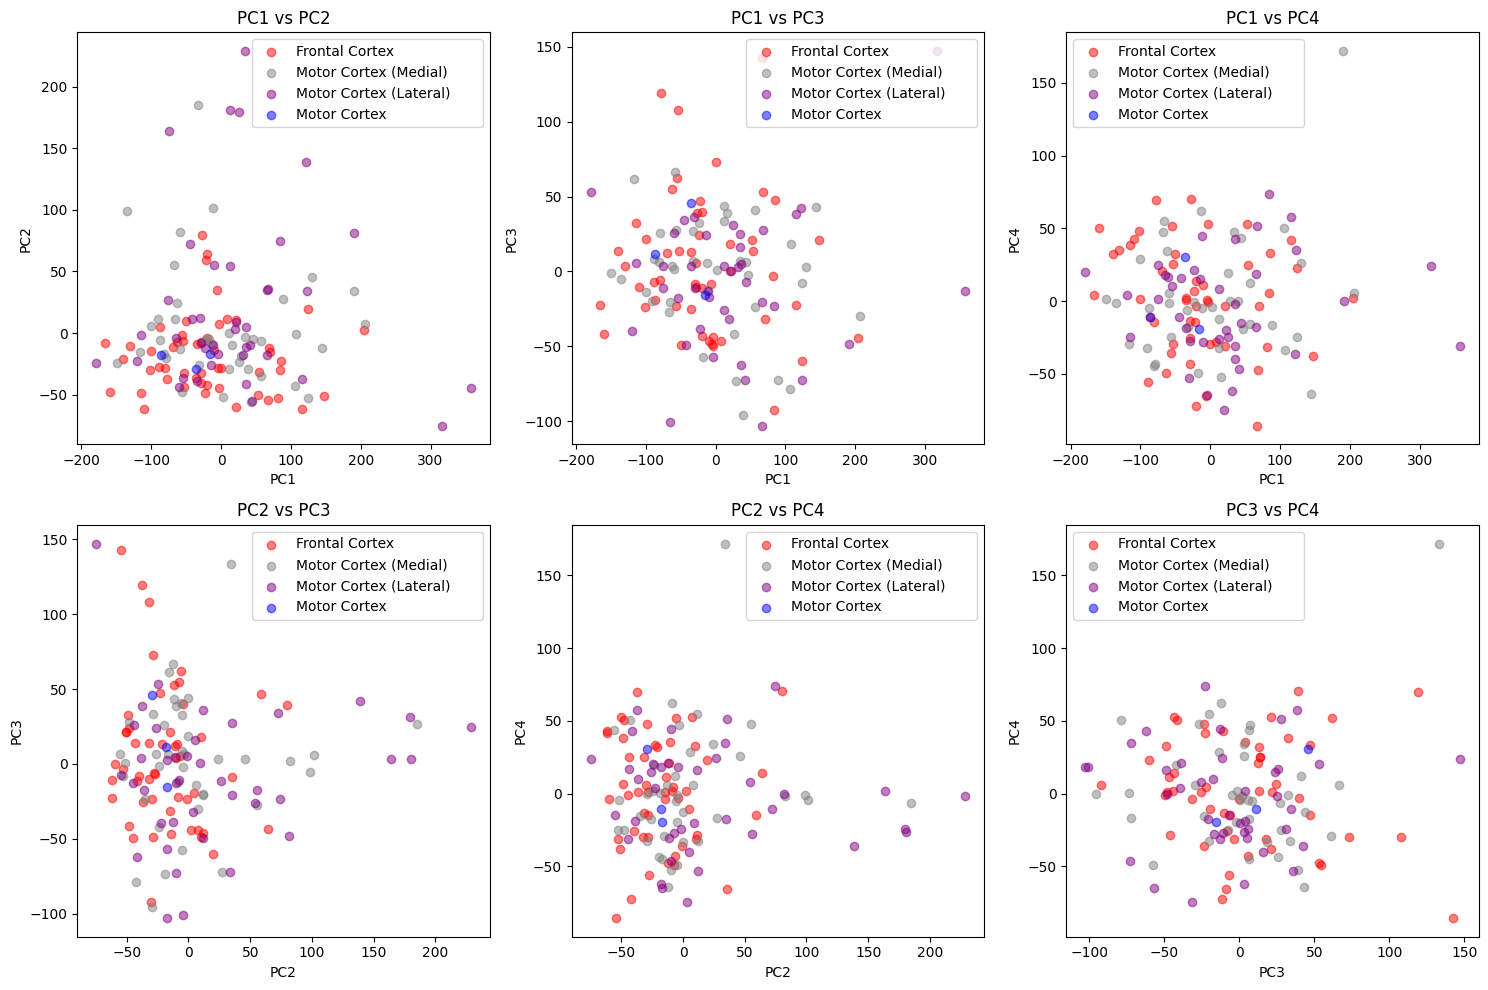

In [65]:
component_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

for i, (comp1, comp2) in enumerate(component_pairs):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    # Tracez les points en utilisant les deux composantes principales de cette paire
    for group, color in color_mapping_reg.items():
        group_df = merged_df[merged_df['Cns_subregion'] == group]
        ax.scatter(X_pca[group_df.index, comp1], X_pca[group_df.index, comp2], c=color, alpha=0.5, label=group)
    
    ax.set_title(f'PC{comp1+1} vs PC{comp2+1}')
    ax.set_xlabel(f'PC{comp1+1}')
    ax.set_ylabel(f'PC{comp2+1}')
    ax.legend()  

plt.tight_layout()
plt.show()


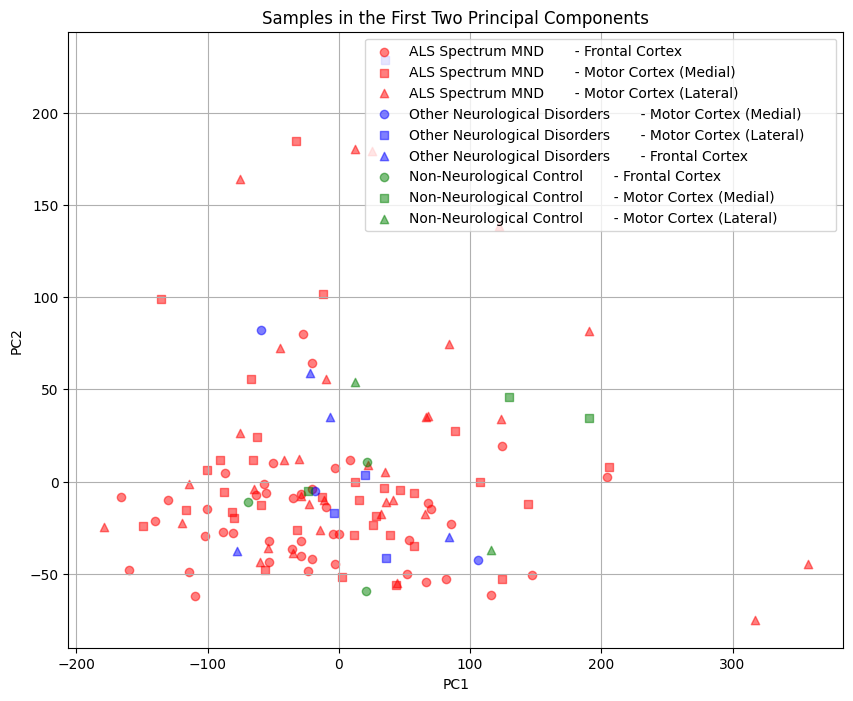

In [66]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

# Parcourir les différentes sous-régions du Cns_subregion
for group, color in color_mapping.items():
    group_df = merged_df[merged_df['sample_group'] == group]
    for subregion, marker in zip(group_df['Cns_subregion'].unique(), ['o', 's', '^']):  # Utilisation de différents marqueurs pour chaque sous-région
        subregion_df = group_df[group_df['Cns_subregion'] == subregion]
        plt.scatter(X_pca[subregion_df.index, 0], X_pca[subregion_df.index, 1], c=color, marker=marker, label=f'{group} - {subregion}', alpha=0.5)


plt.legend()
plt.title('Samples in the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


# univariate analysis DESeq2

In [67]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [68]:
merg_df = merged_df.copy()
merg_df.set_index('Sample_id', inplace=True)

# Diviser le DataFrame en deux (genes et region + group)
counts_df = merg_df.iloc[:, :-8]
metadata = merg_df.iloc[:, -8:] 

In [69]:
counts_df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533359,29,145,0,1424,119,111,1,4,52,0,...,751,1853,1655,922,89,503,131,463,1624,1742
GSM3533360,26,123,0,1541,99,164,0,1,85,0,...,708,1514,1433,845,58,394,102,378,1477,1529
GSM3533361,92,341,0,2660,163,288,0,11,78,0,...,1194,2785,2520,1308,123,632,163,655,2479,2930


In [70]:
colonnes = ['tissue_type', 'subject_id', 'Treatment-Protocol','mean','median','std']
metadata = metadata.drop(columns=colonnes)

metadata

,Cns_subregion,sample_group
Sample_id,,
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533359,Frontal Cortex,ALS Spectrum MND
GSM3533360,Motor Cortex (Medial),ALS Spectrum MND
GSM3533361,Motor Cortex (Lateral),ALS Spectrum MND


In [71]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [72]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="sample_group",
    refit_cooks=True,
    inference=inference,
)

C:\Users\ania\AppData\Local\Temp\ipykernel_24024\4284843602.py:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [73]:
dds.deseq2()

Fitting size factors...
... done in 0.25 seconds.

Fitting dispersions...
... done in 15.23 seconds.

Fitting dispersion trend curve...
... done in 2.04 seconds.

Fitting MAP dispersions...
... done in 64.61 seconds.

Fitting LFCs...
... done in 10.74 seconds.

Replacing 213 outlier genes.

Fitting dispersions...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 0.29 seconds.

Fitting LFCs...
... done in 0.26 seconds.



In [74]:
print(dds)

AnnData object with n_obs × n_vars = 134 × 25846
    obs: 'Cns_subregion', 'sample-group'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


In [75]:
stat_res = DeseqStats(dds, inference=inference)

In [76]:
stat_res.summary()

Running Wald tests...
... done in 4.41 seconds.



Log2 fold change & Wald test p-value: sample-group Non-Neurological Control       vs ALS Spectrum MND      
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.898832        0.223903  0.206032  1.086741   
A1BG-AS1                 107.660070       -0.033347  0.136950 -0.243498   
A1CF                       0.204583       -0.929098  2.074258 -0.447918   
A2M                     2267.508082       -0.055816  0.231286 -0.241330   
A2M-AS1                   99.695540       -0.335047  0.145391 -2.304447   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         452.114546       -0.230906  0.146885 -1.572022   
X9_LINE:L1:LINE          110.040709       -0.277895  0.157516 -1.764231   
Zaphod2:hAT-Tip100:DNA   404.197740       -0.279589  0.150633 -1.856094   
Zaphod3:hAT-Tip100:DNA  1504.515294       -0.176196  0.151428 -1.163564   
Zaphod:hAT-Tip100:DNA   1694.324076       -0.180851  0.136952 -1.32

In [77]:
stat_res.summary()

Log2 fold change & Wald test p-value: sample-group Non-Neurological Control       vs ALS Spectrum MND      
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.898832        0.223903  0.206032  1.086741   
A1BG-AS1                 107.660070       -0.033347  0.136950 -0.243498   
A1CF                       0.204583       -0.929098  2.074258 -0.447918   
A2M                     2267.508082       -0.055816  0.231286 -0.241330   
A2M-AS1                   99.695540       -0.335047  0.145391 -2.304447   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         452.114546       -0.230906  0.146885 -1.572022   
X9_LINE:L1:LINE          110.040709       -0.277895  0.157516 -1.764231   
Zaphod2:hAT-Tip100:DNA   404.197740       -0.279589  0.150633 -1.856094   
Zaphod3:hAT-Tip100:DNA  1504.515294       -0.176196  0.151428 -1.163564   
Zaphod:hAT-Tip100:DNA   1694.324076       -0.180851  0.136952 -1.32

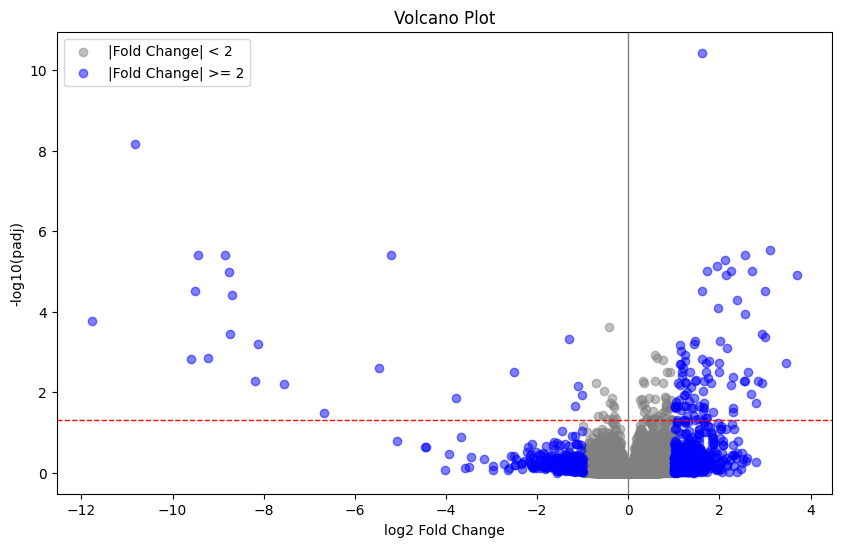

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Contrôle du taux de découverte de faux positifs (FDR)
fdr = stat_res.results_df['padj']
fold_change = stat_res.results_df['log2FoldChange']


plt.figure(figsize=(10, 6))

# Points avec un fold-change < 2 en gris
plt.scatter(fold_change[np.abs(fold_change) < 1], -np.log10(fdr[np.abs(fold_change) < 1]), color='gray', alpha=0.5, label='|Fold Change| < 2')

# Points avec un fold-change >= 2 en bleu
plt.scatter(fold_change[np.abs(fold_change) >= 1], -np.log10(fdr[np.abs(fold_change) >= 1]), color='blue', alpha=0.5, label='|Fold Change| >= 2')

plt.axhline(-np.log10(0.05), color='red', linestyle='--', linewidth=1)  # Ligne pour seuil de FDR de 5%
plt.axvline(0, color='gray', linestyle='-', linewidth=1)  # Ligne pour log2FoldChange de 0
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(padj)')
plt.title('Volcano Plot')
plt.legend()
plt.show()


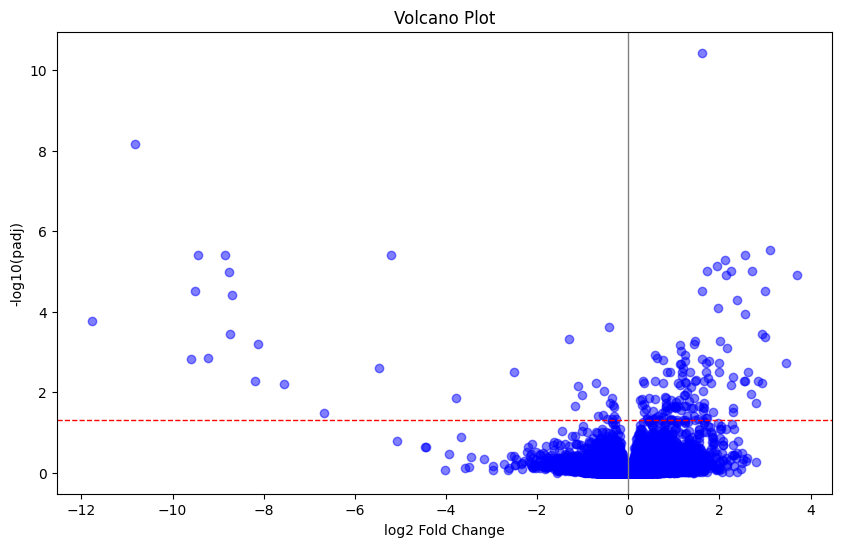

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Contrôle du taux de découverte de faux positifs (FDR)
fdr = stat_res.results_df['padj']

plt.figure(figsize=(10, 6))
plt.scatter(stat_res.results_df['log2FoldChange'], -np.log10(stat_res.results_df['padj']), color='blue', alpha=0.5)
plt.axhline(-np.log10(0.05), color='red', linestyle='--', linewidth=1)  # Ligne pour seuil de FDR de 5%
plt.axvline(0, color='gray', linestyle='-', linewidth=1)  # Ligne pour log2FoldChange de 0
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(padj)')
plt.title('Volcano Plot')
plt.show()


In [80]:
# Filtrage des gènes en fonction de la valeur absolue de log2FoldChange (lfc) > seuil
seuil_lfc = 1.0  
data_filtre_lfc = stat_res.results_df[abs(stat_res.results_df['log2FoldChange']) > seuil_lfc]

# Affichage des gènes filtrés pour lfc et padj
print("Gènes filtrés pour log2FoldChange (lfc) > ", seuil_lfc)
print(data_filtre_lfc)

Gènes filtrés pour log2FoldChange (lfc) >  1.0
                    baseMean  log2FoldChange     lfcSE      stat  \
AADACP1             0.873813       -2.053015  1.323546 -1.551147   
ABCC13              1.554756       -1.965938  0.970665 -2.025351   
ACCSL               1.356739        1.001306  0.680712  1.470969   
ACHE              332.002574        1.142059  0.232026  4.922108   
ADAM7               0.070565        1.067873  2.775166  0.384796   
...                      ...             ...       ...       ...   
ZNF679              0.225809        1.677957  1.435051  1.169266   
ZNF735              0.623233        1.635931  0.773979  2.113662   
ZP2                 0.198034        1.068909  1.324982  0.806735   
ZYG11A              1.143919        2.563138  0.480214  5.337489   
LTR12B:ERV1:LTR  1059.824978       -2.517564  0.558475 -4.507929   

                       pvalue      padj  
AADACP1          1.208664e-01  0.672773  
ABCC13           4.283130e-02  0.513740  
ACCSL     

In [81]:
# Filtrage des gènes en fonction de la valeur p ajustée (padj) < seuil
seuil_padj = 0.05  #seuil de p ajustee 
data_filtre_padj = stat_res.results_df[stat_res.results_df['padj'] < seuil_padj]

print("\nGènes filtrés pour p ajustée (padj) < ", seuil_padj)

print(data_filtre_padj.sort_values(by='padj').head(10))


Gènes filtrés pour p ajustée (padj) <  0.05
               baseMean  log2FoldChange     lfcSE      stat        pvalue  \
IFI6         393.155219        1.622197  0.203168  7.984513  1.410777e-15   
USP9Y       1719.312781      -10.815399  1.498789 -7.216092  5.350297e-13   
CFAP157        2.245605        3.115430  0.496082  6.280064  3.384338e-10   
CALCB          2.692095        2.554763  0.418252  6.108194  1.007650e-09   
KDM5D        637.586053       -9.449228  1.539176 -6.139146  8.296604e-10   
PCDH11Y      580.449580       -5.197130  0.851717 -6.101945  1.047852e-09   
UTY          653.654137       -8.843364  1.437263 -6.152919  7.606957e-10   
PGR           64.805604        2.116870  0.350868  6.033241  1.607034e-09   
ANKRD20A9P    10.518298        1.955489  0.328016  5.961566  2.498326e-09   
MAP3K15        6.345384        1.720553  0.292965  5.872889  4.282647e-09   

                    padj  
IFI6        3.645871e-11  
USP9Y       6.913386e-09  
CFAP157     2.915382e-06  

In [82]:
# Sélection des gènes candidats dans le volcano plot
genes_candidats = stat_res.results_df[(stat_res.results_df['log2FoldChange'].abs() > seuil_lfc) & 
                                    (stat_res.results_df['padj'] < seuil_padj)]

# Affichage des gènes candidats dans un tableau
print("Gènes candidats:")
genes_candidats.sort_values(by='padj').head(40)


Gènes candidats:


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
IFI6,393.155219,1.622197,0.203168,7.984513,1.410777e-15,3.645871e-11
USP9Y,1719.312781,-10.815399,1.498789,-7.216092,5.350297e-13,6.913386e-09
CFAP157,2.245605,3.115430,0.496082,6.280064,3.384338e-10,2.915382e-06
PCDH11Y,580.449580,-5.197130,0.851717,-6.101945,1.047852e-09,3.868521e-06
CALCB,2.692095,2.554763,0.418252,6.108194,1.007650e-09,3.868521e-06
UTY,653.654137,-8.843364,1.437263,-6.152919,7.606957e-10,3.868521e-06
KDM5D,637.586053,-9.449228,1.539176,-6.139146,8.296604e-10,3.868521e-06
PGR,64.805604,2.116870,0.350868,6.033241,1.607034e-09,5.191323e-06
ANKRD20A9P,10.518298,1.955489,0.328016,5.961566,2.498326e-09,7.173803e-06
SLC2A14,4.621560,2.252388,0.383391,5.874915,4.230616e-09,9.696106e-06


In [83]:
genes_pertinents = genes_candidats.sort_values(by='padj').head(40).index

In [84]:
genes_pertinents

Index(['IFI6', 'USP9Y', 'CFAP157', 'PCDH11Y', 'CALCB', 'UTY', 'KDM5D', 'PGR',
       'ANKRD20A9P', 'SLC2A14', 'MAP3K15', 'NPSR1', 'DDX3Y', 'TMEM72',
       'MRGPRE', 'MYBPH', 'TXLNGY', 'ANKRD34B', 'RPS4Y1', 'TH', 'TAC1',
       'ZYG11A', 'TTTY15', 'ZFY', 'LOC101928932', 'TREML2', 'LRRC37A2',
       'NXPH4', 'VWA5B1', 'VGLL3', 'PRKY', 'ACHE', 'PZP', 'COL25A1', 'ISM1',
       'TTTY14', 'EIF1AY', 'SCUBE1', 'TRDN', 'LRRC14B'],
      dtype='object')

In [136]:
raz_tableau()

In [137]:
print("Tableau des gènes:")
for gene, coefficient in tableau_genes.items():
    print(gene, ":", coefficient)

Tableau des gènes:


In [138]:
# maj du tableau des gènes identifiés comme pertinents
genes_pertinents = genes_candidats.sort_values(by='padj').head(40).index
for gene in genes_pertinents:
    mettre_a_jour_tableau(gene, 1)  


print("Tableau des gènes:")
for gene, coefficient in tableau_genes.items():
    print(gene, ":", coefficient)

Tableau des gènes:
IFI6 : 1
USP9Y : 1
CFAP157 : 1
PCDH11Y : 1
CALCB : 1
UTY : 1
KDM5D : 1
PGR : 1
ANKRD20A9P : 1
SLC2A14 : 1
MAP3K15 : 1
NPSR1 : 1
DDX3Y : 1
TMEM72 : 1
MRGPRE : 1
MYBPH : 1
TXLNGY : 1
ANKRD34B : 1
RPS4Y1 : 1
TH : 1
TAC1 : 1
ZYG11A : 1
TTTY15 : 1
ZFY : 1
LOC101928932 : 1
TREML2 : 1
LRRC37A2 : 1
NXPH4 : 1
VWA5B1 : 1
VGLL3 : 1
PRKY : 1
ACHE : 1
PZP : 1
COL25A1 : 1
ISM1 : 1
TTTY14 : 1
EIF1AY : 1
SCUBE1 : 1
TRDN : 1
LRRC14B : 1


# Multivariate Analysis- ElasticNet

In [88]:
X_genes = counts_df.copy()

In [89]:
y_grp = metadata.copy().drop('Cns_subregion', axis=1)
y_grp 

,sample_group
Sample_id,
GSM3533230,ALS Spectrum MND
GSM3533231,ALS Spectrum MND
GSM3533232,ALS Spectrum MND
GSM3533233,ALS Spectrum MND
GSM3533234,ALS Spectrum MND
...,...
GSM3533359,ALS Spectrum MND
GSM3533360,ALS Spectrum MND
GSM3533361,ALS Spectrum MND


In [90]:
# Créer un dictionnaire de remplacement
repl= {'ALS Spectrum MND      ': 'malade', 'Other Neurological Disorders      ': 'malade', 'Non-Neurological Control      ' : 'control'}

y_grp['sample_group'] = y_grp['sample_group'].replace(repl)


In [91]:
y_grp.value_counts()

sample_group
malade          126
control           8
Name: count, dtype: int64

Normalisation

In [92]:
columns = X_genes.columns[0:]
X_norm = X_genes.copy()
X_norm[columns] = normalize(X_norm[columns])

In [93]:
import numpy as np

#verification de la normalisation

mean_values = np.mean(X_norm, axis=0)
std_dev_values = np.std(X_norm, axis=0)

print("Moyenne de chaque colonne (doit être proche de zéro) :")
print(mean_values)

print("\nÉcart type de chaque colonne (doit être proche de un) :")
print(std_dev_values)


Moyenne de chaque colonne (doit être proche de zéro) :
A1BG                      3.911589e-05
A1BG-AS1                  1.168261e-04
A1CF                      2.290342e-07
A2M                       2.421599e-03
A2M-AS1                   1.055969e-04
                              ...     
X8_LINE:CR1:LINE          4.673152e-04
X9_LINE:L1:LINE           1.139593e-04
Zaphod2:hAT-Tip100:DNA    4.193009e-04
Zaphod3:hAT-Tip100:DNA    1.553763e-03
Zaphod:hAT-Tip100:DNA     1.763584e-03
Length: 25846, dtype: float64

Écart type de chaque colonne (doit être proche de un) :
A1BG                      1.832778e-05
A1BG-AS1                  3.804637e-05
A1CF                      7.777092e-07
A2M                       1.101241e-03
A2M-AS1                   2.667262e-05
                              ...     
X8_LINE:CR1:LINE          5.937891e-05
X9_LINE:L1:LINE           1.983308e-05
Zaphod2:hAT-Tip100:DNA    6.830115e-05
Zaphod3:hAT-Tip100:DNA    2.111734e-04
Zaphod:hAT-Tip100:DNA     2.450740e-04


In [94]:
X_norm

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,0.000034,0.000121,0.000000,0.002708,0.000082,0.000063,3.255793e-06,0.000000e+00,0.000055,0.000000,...,0.000803,0.001805,0.001706,0.000912,0.000068,0.000453,0.000109,0.000464,0.001665,0.001991
GSM3533231,0.000022,0.000095,0.000002,0.001587,0.000136,0.000097,1.776679e-06,8.883395e-07,0.000022,0.000000,...,0.001080,0.002108,0.001778,0.001016,0.000105,0.000517,0.000136,0.000490,0.001827,0.002025
GSM3533232,0.000021,0.000098,0.000000,0.001895,0.000125,0.000132,1.035474e-06,1.035474e-06,0.000011,0.000000,...,0.000937,0.002090,0.001879,0.001047,0.000087,0.000591,0.000130,0.000496,0.001718,0.001841
GSM3533233,0.000019,0.000089,0.000000,0.001879,0.000125,0.000126,4.409408e-06,8.818817e-07,0.000032,0.000000,...,0.000825,0.002009,0.001792,0.001056,0.000086,0.000496,0.000116,0.000476,0.001792,0.001883
GSM3533234,0.000019,0.000087,0.000000,0.001458,0.000071,0.000152,8.548217e-07,2.564465e-06,0.000026,0.000000,...,0.000826,0.001962,0.001704,0.000985,0.000082,0.000498,0.000106,0.000461,0.001489,0.001657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533359,0.000028,0.000140,0.000000,0.001371,0.000115,0.000107,9.625657e-07,3.850263e-06,0.000050,0.000000,...,0.000723,0.001784,0.001593,0.000887,0.000086,0.000484,0.000126,0.000446,0.001563,0.001677
GSM3533360,0.000029,0.000135,0.000000,0.001691,0.000109,0.000180,0.000000e+00,1.097462e-06,0.000093,0.000000,...,0.000777,0.001662,0.001573,0.000927,0.000064,0.000432,0.000112,0.000415,0.001621,0.001678
GSM3533361,0.000060,0.000223,0.000000,0.001738,0.000107,0.000188,0.000000e+00,7.188532e-06,0.000051,0.000000,...,0.000780,0.001820,0.001647,0.000855,0.000080,0.000413,0.000107,0.000428,0.001620,0.001915


elasticNet

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

scaler = StandardScaler()
X_norm2 = scaler.fit_transform(X)

elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.5, max_iter=1000).fit(X_norm2, y_grp)


C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [96]:
from sklearn.metrics import accuracy_score

model_prediction = elasticNet.predict(X_norm2)
accuracy_train_dataset = accuracy_score(y_grp, model_prediction)

elasticNetCV - accuracy

In [97]:
elasticNetCV = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring= 'accuracy').fit(X_norm2, y_grp)

C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

In [98]:
from sklearn.metrics import accuracy_score
model_predictionCV = elasticNetCV.predict(X_norm2)
accuracy_train_datasetCV = accuracy_score(y_grp, model_predictionCV)

In [99]:
import numpy as np

# Calculer les valeurs absolues des coefficients
absolute_coefs = np.abs(elasticNetCV.coef_)

# Créer un tableau de tuples (nom du gène, valeur absolue du coefficient)
gene_coef_pairs = zip(X_genes.columns, absolute_coefs[0])

# Trier les paires de gènes et de coefficients par ordre décroissant des valeurs absolues des coefficients
gene_coef_pairs_sorted = sorted(gene_coef_pairs, key=lambda x: x[1], reverse=True)


# Afficher les gènes les plus importants
print("Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :")
for i, gene in enumerate(gene_coef_pairs_sorted[:10], start=1):
    print(f"{i}. {gene[0]} | {gene[1]}")


Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :
1. MCPH1-AS1 | 0.013888883817560045
2. ANKRD42 | 0.010707959856607364
3. MamRep605:MamRep605:Unknown | 0.010461566357925728
4. TOMM34 | 0.010158327156170271
5. LINC02003 | 0.008941211934405342
6. ADCY7 | 0.007751981167874729
7. GAA | 0.007520745512940551
8. GORASP2 | 0.007372981336171364
9. CASTOR1 | 0.007303850569717349
10. HYAL2 | 0.006376797514011445


elasticNet - f1

In [100]:
elasticNetCVF1 = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring= 'f1').fit(X_norm2, y_grp)

C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Convergen

In [101]:
from sklearn.metrics import f1_score
model_predictionCVF1 = elasticNetCVF1.predict(X_norm2)
f1_score_train_datasetCVF1 = f1_score(y_grp, model_predictionCVF1,pos_label='malade')

In [102]:
f1_score_train_datasetCVF1

0.979757085020243

In [103]:
import numpy as np

# Calculer les valeurs absolues des coefficients
absolute_coefs = np.abs(elasticNetCVF1.coef_)

# Créer un tableau de tuples (nom du gène, valeur absolue du coefficient)
gene_coef_pairs = zip(X_genes.columns, absolute_coefs[0])

# Trier les paires de gènes et de coefficients par ordre décroissant des valeurs absolues des coefficients
gene_coef_pairs_sorted = sorted(gene_coef_pairs, key=lambda x: x[1], reverse=True)


# Afficher les gènes les plus importants
print("Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :")
for i, gene in enumerate(gene_coef_pairs_sorted[:10], start=1):
    print(f"{i}. {gene[0]} | {gene[1]}")


Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :
1. MCPH1-AS1 | 0.013955368855735544
2. ANKRD42 | 0.010795862088299966
3. MamRep605:MamRep605:Unknown | 0.010509262953285891
4. TOMM34 | 0.010113230114892253
5. LINC02003 | 0.008965347725527973
6. ADCY7 | 0.007761112266334069
7. GORASP2 | 0.007697678011969467
8. GAA | 0.007604223071013742
9. CASTOR1 | 0.00731235336099428
10. HYAL2 | 0.006458425509633401


elasticNet - balanced accuracy

In [104]:
from sklearn.metrics import balanced_accuracy_score
elasticNetCV2 = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring='balanced_accuracy').fit(X_norm2, y_grp)
model_predictionCV2 = elasticNetCV2.predict(X_norm2)
accuracy_train_datasetCV2 = balanced_accuracy_score(y_grp, model_predictionCV2)

C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Convergen

In [105]:
accuracy_train_datasetCV2

0.9642857142857143

In [106]:
import numpy as np

# Calculer les valeurs absolues des coefficients
absolute_coefs = np.abs(elasticNetCV2.coef_)

# Créer un tableau de tuples (nom du gène, valeur absolue du coefficient)
gene_coef_pairs = zip(X_genes.columns, absolute_coefs[0])

# Trier les paires de gènes et de coefficients par ordre décroissant des valeurs absolues des coefficients
gene_coef_pairs_sorted = sorted(gene_coef_pairs, key=lambda x: x[1], reverse=True)


# Afficher les gènes les plus importants
print("Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :")
for i, gene in enumerate(gene_coef_pairs_sorted[:10], start=1):
    print(f"{i}. {gene[0]} | {gene[1]}")

Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :
1. MCPH1-AS1 | 0.01363221838703305
2. ANKRD42 | 0.011860471205970724
3. TOMM34 | 0.01041944956424584
4. LINC02003 | 0.010305583105711454
5. MamRep605:MamRep605:Unknown | 0.010232383644440127
6. ADCY7 | 0.009676719253417738
7. GAA | 0.008673988259322907
8. GORASP2 | 0.008632268541438467
9. CASTOR1 | 0.008432357304181955
10. ALYREF | 0.00804601299014017


Matthews Correlation Coefficient

In [107]:
from sklearn.metrics import matthews_corrcoef

elasticNet_mcc = LogisticRegressionCV(penalty='elasticnet', cv=3, solver='saga', l1_ratios=[0.25, 0.5, 0.75], Cs=[0.1, 0.5], scoring='accuracy').fit(X_norm2, y_grp)
model_prediction_mcc = elasticNet_mcc.predict(X_norm2)

mcc_train_dataset = matthews_corrcoef(y_grp, model_prediction_mcc)

print("Matthews Correlation Coefficient (MCC) :", mcc_train_dataset)


C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

Matthews Correlation Coefficient (MCC) : 0.7687422135960733


C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [108]:
import numpy as np

# Calculer les valeurs absolues des coefficients
absolute_coefs = np.abs(elasticNet_mcc.coef_)

# Créer un tableau de tuples (nom du gène, valeur absolue du coefficient)
gene_coef_pairs = zip(X_genes.columns, absolute_coefs[0])

# Trier les paires de gènes et de coefficients par ordre décroissant des valeurs absolues des coefficients
gene_coef_pairs_sorted = sorted(gene_coef_pairs, key=lambda x: x[1], reverse=True)


# Afficher les gènes les plus importants
print("Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :")
for i, gene in enumerate(gene_coef_pairs_sorted[:10], start=1):
    print(f"{i}. {gene[0]} | {gene[1]}")

Les gènes les plus importants pour différencier les échantillons ALS des échantillons de contrôle :
1. MCPH1-AS1 | 0.013958566978367557
2. ANKRD42 | 0.010784475641270733
3. MamRep605:MamRep605:Unknown | 0.01052566698834534
4. TOMM34 | 0.010190346694610306
5. LINC02003 | 0.008985325282733238
6. ADCY7 | 0.007780056008639827
7. GAA | 0.007630914647507862
8. GORASP2 | 0.007457928945733804
9. CASTOR1 | 0.007289022288588339
10. HYAL2 | 0.006413983700196335


In [139]:
# maj des gènes identifiés comme pertinents
genes_pertinents = gene_coef_pairs_sorted[:20]
for gene in genes_pertinents:
    mettre_a_jour_tableau(gene[0], 1) 

In [140]:
#print tableau sorted by coef

print("Tableau des gènes :") 

for gene, coefficient in sorted(tableau_genes.items(), key=lambda x: x[1], reverse=True):
    print(gene, ":", coefficient)

Tableau des gènes :
IFI6 : 1
USP9Y : 1
CFAP157 : 1
PCDH11Y : 1
CALCB : 1
UTY : 1
KDM5D : 1
PGR : 1
ANKRD20A9P : 1
SLC2A14 : 1
MAP3K15 : 1
NPSR1 : 1
DDX3Y : 1
TMEM72 : 1
MRGPRE : 1
MYBPH : 1
TXLNGY : 1
ANKRD34B : 1
RPS4Y1 : 1
TH : 1
TAC1 : 1
ZYG11A : 1
TTTY15 : 1
ZFY : 1
LOC101928932 : 1
TREML2 : 1
LRRC37A2 : 1
NXPH4 : 1
VWA5B1 : 1
VGLL3 : 1
PRKY : 1
ACHE : 1
PZP : 1
COL25A1 : 1
ISM1 : 1
TTTY14 : 1
EIF1AY : 1
SCUBE1 : 1
TRDN : 1
LRRC14B : 1
MCPH1-AS1 : 1
ANKRD42 : 1
MamRep605:MamRep605:Unknown : 1
TOMM34 : 1
LINC02003 : 1
ADCY7 : 1
GAA : 1
GORASP2 : 1
CASTOR1 : 1
HYAL2 : 1
ALYREF : 1
FAM181A-AS1 : 1
MIR3656 : 1
PCBP2-OT1 : 1
SRSF12 : 1
LOC101926943 : 1
MIR4514 : 1
LINC01915 : 1
FAM87B : 1
SPDEF : 1


# XGBOOST

In [111]:
y_xgb = y_grp.copy()
X_train = X_norm.copy()

In [112]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_xgb_encoded = label_encoder.fit_transform(y_xgb)

C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
y_xgb_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [114]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_xgb_encoded) # xtrain is your data matrix, and y is your group labels (ctrl or ALS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
print(model.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

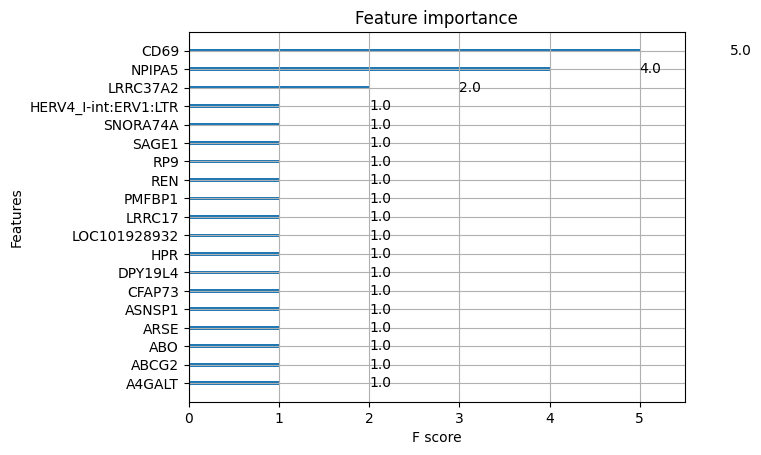

In [116]:
from xgboost import plot_importance
plot_importance(model)

# XGBOOST

In [118]:
y_xgb = y_grp.copy()
X_train = X_norm.copy()

In [119]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_xgb_encoded = label_encoder.fit_transform(y_xgb)

C:\Users\ania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
X_train

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,0.000034,0.000121,0.000000,0.002708,0.000082,0.000063,3.255793e-06,0.000000e+00,0.000055,0.000000,...,0.000803,0.001805,0.001706,0.000912,0.000068,0.000453,0.000109,0.000464,0.001665,0.001991
GSM3533231,0.000022,0.000095,0.000002,0.001587,0.000136,0.000097,1.776679e-06,8.883395e-07,0.000022,0.000000,...,0.001080,0.002108,0.001778,0.001016,0.000105,0.000517,0.000136,0.000490,0.001827,0.002025
GSM3533232,0.000021,0.000098,0.000000,0.001895,0.000125,0.000132,1.035474e-06,1.035474e-06,0.000011,0.000000,...,0.000937,0.002090,0.001879,0.001047,0.000087,0.000591,0.000130,0.000496,0.001718,0.001841
GSM3533233,0.000019,0.000089,0.000000,0.001879,0.000125,0.000126,4.409408e-06,8.818817e-07,0.000032,0.000000,...,0.000825,0.002009,0.001792,0.001056,0.000086,0.000496,0.000116,0.000476,0.001792,0.001883
GSM3533234,0.000019,0.000087,0.000000,0.001458,0.000071,0.000152,8.548217e-07,2.564465e-06,0.000026,0.000000,...,0.000826,0.001962,0.001704,0.000985,0.000082,0.000498,0.000106,0.000461,0.001489,0.001657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533359,0.000028,0.000140,0.000000,0.001371,0.000115,0.000107,9.625657e-07,3.850263e-06,0.000050,0.000000,...,0.000723,0.001784,0.001593,0.000887,0.000086,0.000484,0.000126,0.000446,0.001563,0.001677
GSM3533360,0.000029,0.000135,0.000000,0.001691,0.000109,0.000180,0.000000e+00,1.097462e-06,0.000093,0.000000,...,0.000777,0.001662,0.001573,0.000927,0.000064,0.000432,0.000112,0.000415,0.001621,0.001678
GSM3533361,0.000060,0.000223,0.000000,0.001738,0.000107,0.000188,0.000000e+00,7.188532e-06,0.000051,0.000000,...,0.000780,0.001820,0.001647,0.000855,0.000080,0.000413,0.000107,0.000428,0.001620,0.001915


In [121]:
y_xgb_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Data Test extraction, from the Data_test dataset (github)

In [122]:
path = "./data_test" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
data_matrix = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)



# tissue := CNS SUBREGION

data_annotation = pd.DataFrame(columns = ['Sample_id', 'tissue', 'diagnosis']) # initialisation of the dataframe
xtree = et.parse('./data_test/GSE122649_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "tissue"):
            temp_tissue = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "diagnosis"):
            temp_diagnosis = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id], 'tissue': [temp_tissue], 'diagnosis': [temp_diagnosis]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [123]:
gene_train = test.get_data_matrix()
print("Amount of training genes : " + str(len(gene_train.columns)) + 
      " and test genes : " + str(len(data_matrix.columns.values)))

additionnal_genes_train = set(gene_train.columns.values) - set(data_matrix.columns.values)
additionnal_genes_test = set(data_matrix.columns.values) - set(gene_train.columns.values)
# note that these "additionnal" genes also contain mean, std and median, which are not genes but will
# have to be removed anyway.
gene_train = gene_train.drop(columns=additionnal_genes_train)
gene_test = data_matrix.drop(columns=additionnal_genes_test)

Amount of training genes : 28957 and test genes : 28952


In [141]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(gene_train, y_xgb_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [142]:
print(model.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

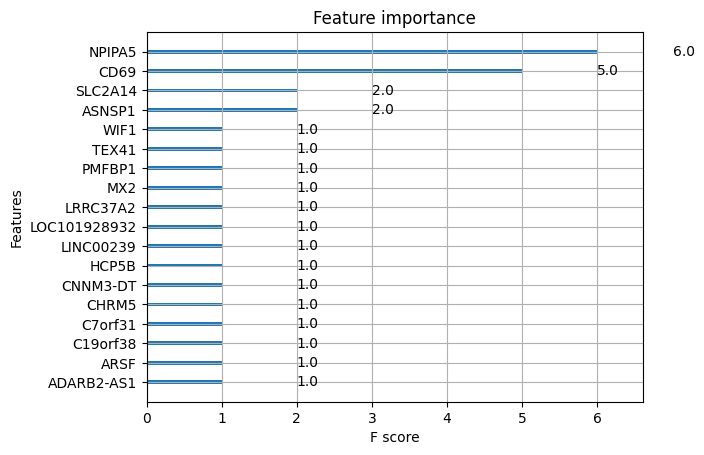

In [143]:
plot_importance(model,  max_num_features=30)

In [144]:
importances = model.feature_importances_

indices_features_importants = np.argsort(importances)[::-1]

#print("Les 20 gènes les plus importants :")
for index in indices_features_importants[:30]:
    #print(gene_train.columns[index])
    mettre_a_jour_tableau(gene_train.columns[index], 1)


In [145]:
print("Tableau des gènes :") 

for gene, coefficient in sorted(tableau_genes.items(), key=lambda x: x[1], reverse=True):
    print(gene, ":", coefficient)

Tableau des gènes :
SLC2A14 : 2
LOC101928932 : 2
LRRC37A2 : 2
IFI6 : 1
USP9Y : 1
CFAP157 : 1
PCDH11Y : 1
CALCB : 1
UTY : 1
KDM5D : 1
PGR : 1
ANKRD20A9P : 1
MAP3K15 : 1
NPSR1 : 1
DDX3Y : 1
TMEM72 : 1
MRGPRE : 1
MYBPH : 1
TXLNGY : 1
ANKRD34B : 1
RPS4Y1 : 1
TH : 1
TAC1 : 1
ZYG11A : 1
TTTY15 : 1
ZFY : 1
TREML2 : 1
NXPH4 : 1
VWA5B1 : 1
VGLL3 : 1
PRKY : 1
ACHE : 1
PZP : 1
COL25A1 : 1
ISM1 : 1
TTTY14 : 1
EIF1AY : 1
SCUBE1 : 1
TRDN : 1
LRRC14B : 1
MCPH1-AS1 : 1
ANKRD42 : 1
MamRep605:MamRep605:Unknown : 1
TOMM34 : 1
LINC02003 : 1
ADCY7 : 1
GAA : 1
GORASP2 : 1
CASTOR1 : 1
HYAL2 : 1
ALYREF : 1
FAM181A-AS1 : 1
MIR3656 : 1
PCBP2-OT1 : 1
SRSF12 : 1
LOC101926943 : 1
MIR4514 : 1
LINC01915 : 1
FAM87B : 1
SPDEF : 1
CD69 : 1
NPIPA5 : 1
ADARB2-AS1 : 1
ARSF : 1
LINC00239 : 1
PMFBP1 : 1
C19orf38 : 1
ASNSP1 : 1
C7orf31 : 1
WIF1 : 1
CHRM5 : 1
HCP5B : 1
MX2 : 1
TEX41 : 1
CNNM3-DT : 1
Zaphod:hAT-Tip100:DNA : 1
KLF10 : 1
KLC3 : 1
KLF1 : 1
KLC4 : 1
KLF12 : 1
KLC2 : 1
KLF11 : 1
KLF16 : 1
KLF13 : 1
KLF14 : 1
KLF15 

In [146]:
len(tableau_genes)

87

In [130]:
preds = model.predict(gene_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The models naively predicts ALS everytime. We will try to regulate that :

In [131]:
num_class_0 = len(y_xgb_encoded[y_xgb_encoded == 0])
num_class_1_and_2 = len(y_xgb_encoded[(y_xgb_encoded == 1) | (y_xgb_encoded == 2)])
scale_pos_weight = num_class_0 / num_class_1_and_2
scale_pos_weight


model = XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(gene_train, y_xgb_encoded) 
preds = model.predict(gene_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

Another try :

In [ ]:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'alpha': [0.1, 0.2, 0.5],
#     'max_depth': [3, 4, 5],
#     'lambda': [0.1, 0.2, 0.5],
#     'gamma': [0, 0.1, 0.2],
# }
param_grid = {
    'alpha': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 10],
    'lambda': [0.01, 0.1, 0.05],
    'gamma': [0.01, 0.2, 0.3],
}
model = XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3, n_jobs=-1)


grid_search.fit(gene_train, y_xgb_encoded) 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

preds = best_model.predict(gene_test)
preds